In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import json


In [13]:
from matplotlib.patches import Patch

In [4]:
for i in range(len(df_gold[df_gold['Answer'] == 'Indirect inconsistency'])):
    sample = df_gold[df_gold['Answer'] == 'Indirect inconsistency']['Input'].iloc[i]
    confidence = df_gold[df_gold['Answer'] == 'Indirect inconsistency']['Confidence'].iloc[i]
    explanation = df_gold[df_gold['Answer'] == 'Indirect inconsistency']['Explanations'].iloc[i]
    if df_gold[df_gold['Answer'] == 'Indirect inconsistency']['NLI_ChatGPT4_turbo'].iloc[i] != 'Inconsistent':
        print(sample)
        print(confidence)
        print("explanation", explanation)


Text 1: Motivated and confident workforce is a crucial success factor for the economy.

Text 2: We support limiting the scope of employee influence in decision-making within companies to promote competitiveness.
80.0
explanation ['Limiting employee influence goes against ideas of increasing their motivation.']
Text 1: We fully support the conversion of additional car streets to bicycle streets.

Text 2: We propose reducing the taxes on the purchase of new cars to stimulate the automotive industry
83.333
explanation ['Text A promotes cycling. Text B encourages car usage. they represent opossing views of transportation.']
Text 1: In the unresolved issue of waste storage, it is irresponsible to further increase the waste.

Text 2: We support the extension of nuclear power plant operating times.
40.0
explanation 0
Text 1: Europe needs tax cuts, not new taxes.

Text 2: We support the EU having the ability to levy its own taxes instead of relying on national contributions.
80.0
explanation [

In [2]:
df_gold = pd.read_csv(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\qualtrics_survey\results\df_gold_all.csv")

In [2]:
classes_5 = ['Unrelated', 'Consistent', 'Indirect inconsistency', 'Factual inconsistency',  'Surface contradiction']
classes_3 = ['Unrelated', 'Consistent', 'Inconsistent']

### Compare confidence distribution in 5 classes

In [4]:
confidence_scores_per_class = dict()
confidence_scores_per_class['Humans'] = dict()
confidence_scores_per_class['ChatGPT-4'] = dict()
confidence_scores_per_class['ChatGPT-3.5'] = dict()
confidence_scores_per_class['LLaMA 8B'] = dict()
confidence_scores_per_class['LLaMA 70B'] = dict()

for model in confidence_scores_per_class:
    for class_name in classes_5:
        confidence_scores_per_class[model][class_name] = []

In [5]:
Counter(df_gold['ChatGPT-4 Confidence'])

Counter({100: 539, 80: 98, 60: 51, 40: 10})

In [13]:
majority_class = 'ChatGPT-4 majority'
for class_name in classes_5:
    df_class = df_gold[df_gold['ChatGPT-4 majority']==class_name]
    for i in range(len(df_class)):
        confidence = df_class['ChatGPT-4 Confidence'].iloc[i]
        confidence_scores_per_class['ChatGPT-4'][class_name].append(confidence)
        

In [17]:
majority_class = 'ChatGPT-3.5 majority'
for class_name in classes_5:
    df_class = df_gold[df_gold['ChatGPT-3.5 majority']==class_name]
    for i in range(len(df_class)):
        confidence = df_class['ChatGPT-3.5 Confidence'].iloc[i]
        confidence_scores_per_class['ChatGPT-3.5'][class_name].append(confidence)
        

In [18]:
for class_name in classes_5:
    df_class = df_gold[df_gold['Llama 8B majority']==class_name]
    for i in range(len(df_class)):
        confidence = df_class['LLaMA 8B Confidence'].iloc[i]
        confidence_scores_per_class['LLaMA 8B'][class_name].append(confidence)
        

In [19]:
for class_name in classes_5:
    df_class = df_gold[df_gold['Llama 70B majority']==class_name]
    for i in range(len(df_class)):
        confidence = df_class['LLaMA 70B Confidence'].iloc[i]
        confidence_scores_per_class['LLaMA 70B'][class_name].append(confidence)
        

In [11]:
for class_name in classes_5:
    df_class = df_gold[df_gold['Answer']==class_name]
    for i in range(len(df_class)):
        confidence = df_class['Confidence'].iloc[i]
        confidence_scores_per_class['Humans'][class_name].append(confidence)

In [12]:
confidence_scores_per_class.keys()

dict_keys(['Humans', 'ChatGPT-4', 'ChatGPT-3.5', 'LLaMA 8B', 'LLaMA 70B'])

In [15]:
for class_name in classes_5:
    print(class_name)
    print(Counter(confidence_scores_per_class['Humans'][class_name]))

Unrelated
Counter({60.0: 36, 100.0: 32, 80.0: 27, 40.0: 21, 50.0: 2})
Consistent
Counter({100.0: 44, 60.0: 23, 40.0: 15, 80.0: 12, 83.333: 1, 50.0: 1})
Indirect inconsistency
Counter({60.0: 82, 40.0: 45, 80.0: 36, 100.0: 6, 83.333: 3, 50.0: 3, 33.333: 2, 66.667: 1, 20.0: 1})
Factual inconsistency
Counter({60.0: 56, 40.0: 39, 80.0: 24, 100.0: 2, 50.0: 1})
Surface contradiction
Counter({60.0: 60, 40.0: 48, 80.0: 43, 100.0: 25, 50.0: 3, 83.333: 2, 66.667: 1, 70.0: 1})


In [14]:
# with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\confidence_scores_per_class.pkl', 'wb') as f:
#     pickle.dump(confidence_scores_per_class, f)

In [4]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\confidence_scores_per_class.pkl', 'rb') as f:
    confidence_scores_per_class = pickle.load(f)

In [5]:
confidence_scores_per_class_counter = dict()

for model in confidence_scores_per_class:
    confidence_scores_per_class_counter[model] = dict()
    for class_name in confidence_scores_per_class[model]:
        confidence_scores_per_class_counter[model][class_name] = Counter(confidence_scores_per_class[model][class_name])

In [8]:
confidence_scores_per_class_counter.keys()

dict_keys(['Humans', 'ChatGPT-4', 'ChatGPT-3.5', 'LLaMA 8B', 'LLaMA 70B'])

In [7]:
data = confidence_scores_per_class_counter

# Convert to a structured DataFrame
rows = []
for model_name, labels in data.items():
    for label, counter in labels.items():
        for score, count in counter.items():
            rows.extend([[model_name, label, score]] * count)

df = pd.DataFrame(rows, columns=["Model", "Label", "Confidence Score"])

# Sort categories
df["Label"] = pd.Categorical(df["Label"], categories=data["Humans"].keys(), ordered=True)
df["Model"] = pd.Categorical(df["Model"], categories=list(confidence_scores_per_class_counter.keys()), ordered=True)


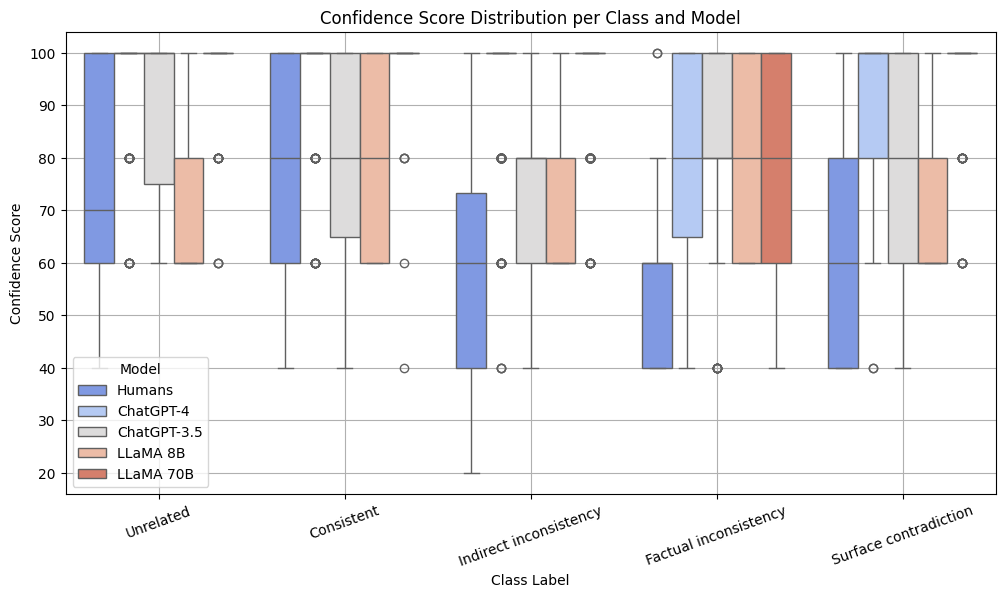

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Label", y="Confidence Score", hue="Model", data=df, palette="coolwarm")
plt.xticks(rotation=20)
plt.title("Confidence Score Distribution per Class and Model")
plt.ylabel("Confidence Score")
plt.xlabel("Class Label")
plt.legend(title="Model")
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py

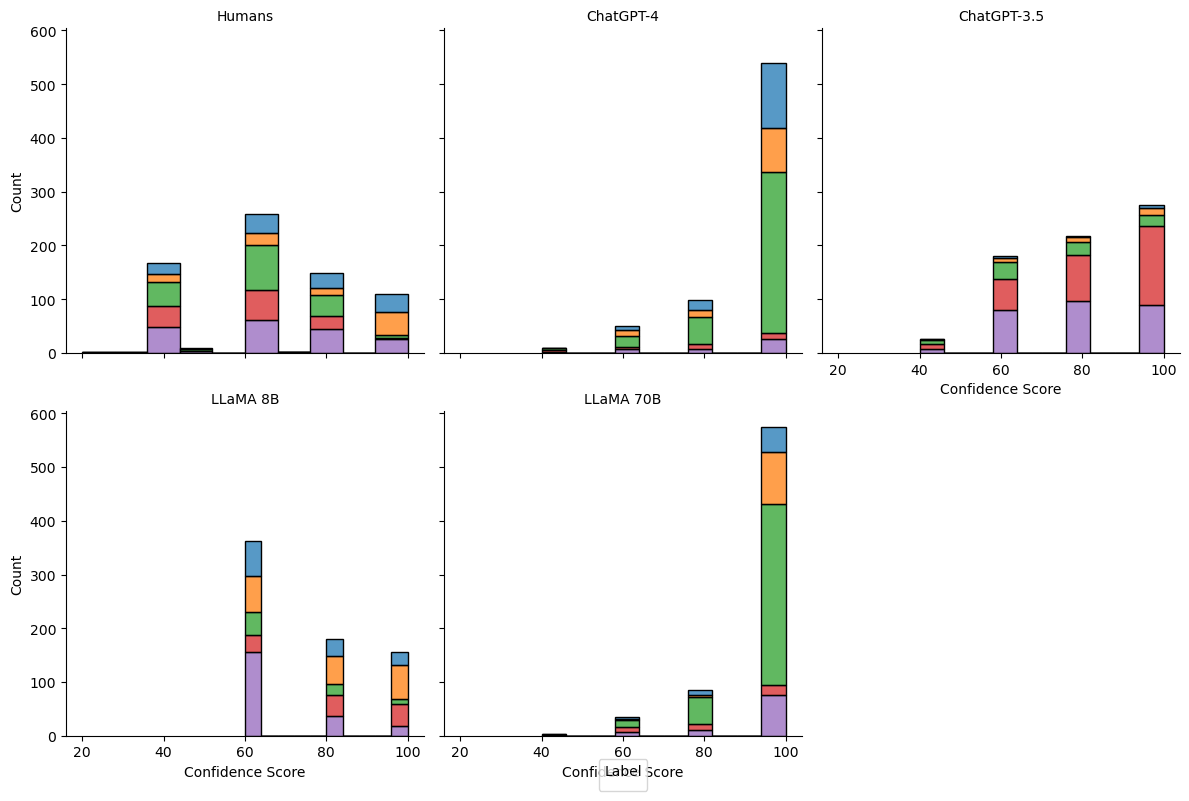

In [11]:
# Create FacetGrid
g = sns.FacetGrid(df, col="Model", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Confidence Score", hue="Label", multiple="stack", bins=10, palette="tab10")

# Manually add a global legend
handles, labels = g.axes[0].get_legend_handles_labels()  # Get handles from first subplot
plt.legend(handles, labels, title="Label", loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

g.set_axis_labels("Confidence Score", "Count")
g.set_titles(col_template="{col_name}")

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py

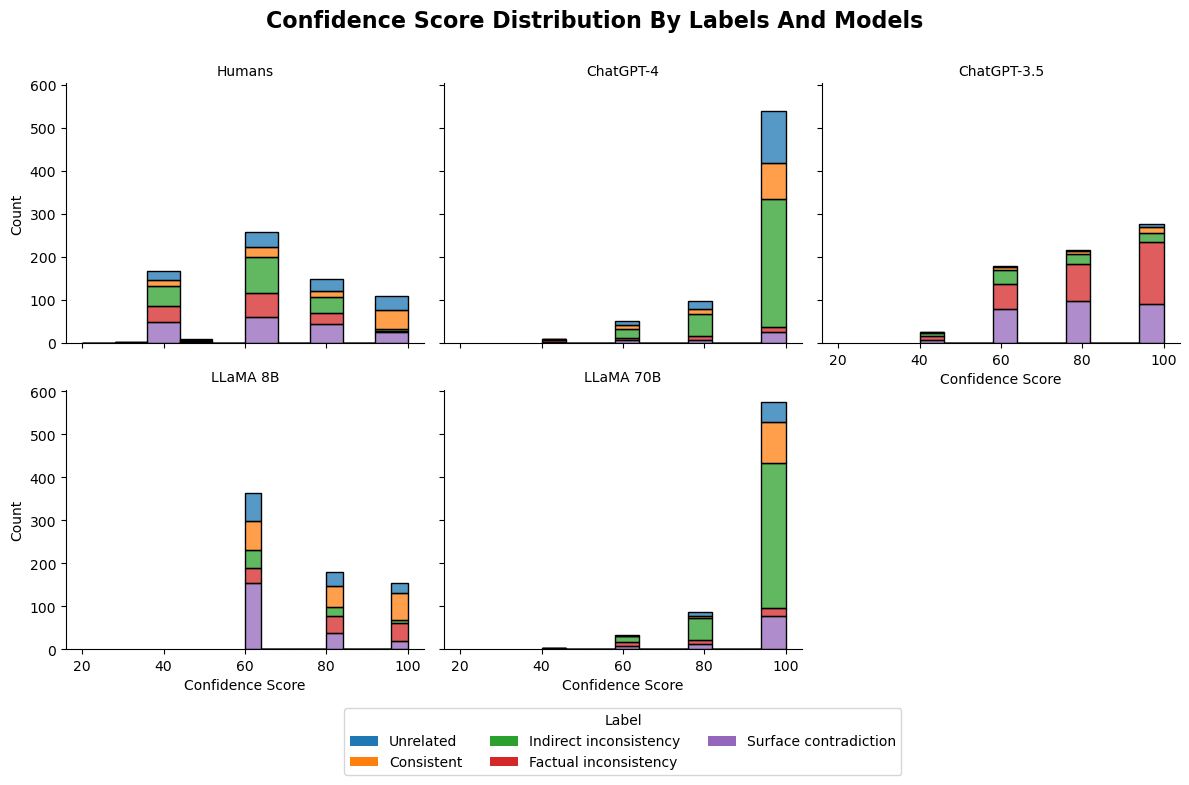

In [24]:
# Define color palette for labels
palette = sns.color_palette("tab10", n_colors=df["Label"].nunique())

# Create FacetGrid
g = sns.FacetGrid(df, col="Model", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Confidence Score", hue="Label", multiple="stack", bins=10, palette=palette)

# # Force x-axis labels for all subplots
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=20)  # Rotate for better visibility
#     ax.set_xlabel("Confidence Score")  # Ensure each subplot has x-axis label

# Extract unique labels and create custom legend
unique_labels = df["Label"].unique()
legend_handles = [Patch(facecolor=palette[i], label=label) for i, label in enumerate(unique_labels)]

# Add extra padding below the plots
plt.subplots_adjust(bottom=0.25)  # Increase space at the bottom

plt.suptitle("Confidence Score Distribution By Labels And Models", fontsize=16, fontweight="bold", y=1.05)
# Add legend with more spacing
plt.legend(handles=legend_handles, title="Label", loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)

g.set_axis_labels("Confidence Score", "Count")
g.set_titles(col_template="{col_name}")
plt.show()


### Compare NLI models

In [2]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\NLI_experiments.pkl', 'rb') as f:
    NLI_experiments = pickle.load(f)

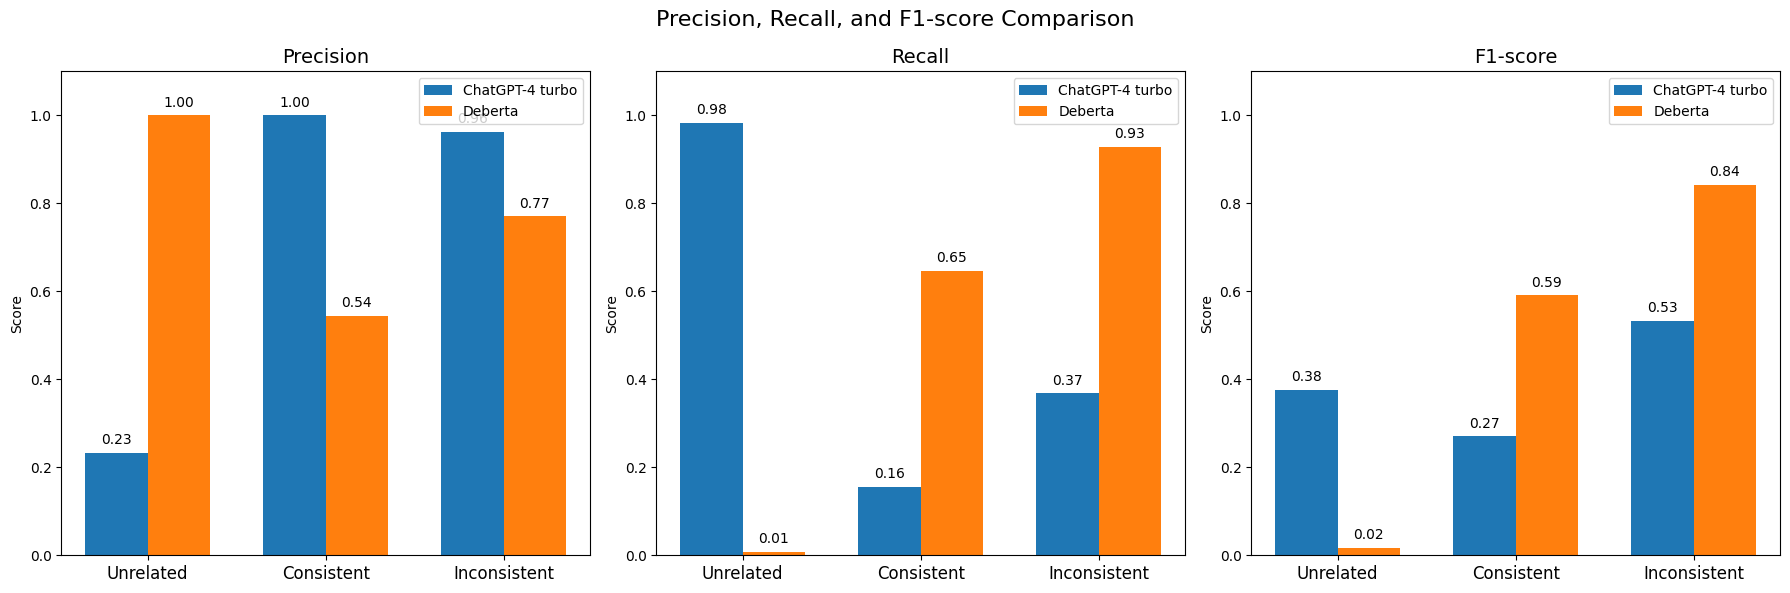

In [12]:
# Define models and categories
models = list(NLI_experiments.keys())
categories = ['Unrelated', 'Consistent', 'Inconsistent']
metrics = ['Precision', 'Recall', 'F1-score']

# Prepare data for plotting
precision_values = {model: [list(NLI_experiments[model]['precision'].keys())[i] for i in range(3)] for model in models}
recall_values = {model: [list(NLI_experiments[model]['recall'].keys())[i] for i in range(3)] for model in models}
f1_values = {model: [list(NLI_experiments[model]['f1_score'].keys())[i] for i in range(3)] for model in models}

# Bar chart setup
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
bar_width = 0.35  # Width of each bar
x = np.arange(len(categories))  # X positions

# Colors for models
colors = ['#1f77b4', '#ff7f0e']

# Plot for each metric
for i, (metric, values) in enumerate(zip(metrics, [precision_values, recall_values, f1_values])):
    ax = axes[i]
    
    # Plot bars for each model
    for j, model in enumerate(models):
        ax.bar(x + j * bar_width, values[model], bar_width, label=model, color=colors[j])
        
        # Add value labels on bars
        for k, val in enumerate(values[model]):
            ax.text(x[k] + j * bar_width, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)

    # Formatting
    ax.set_title(metric, fontsize=14)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_ylim(0, 1.1)  # Keeping scale consistent across plots
    ax.set_ylabel('Score')
    ax.legend()

# Adjust layout and show plot
plt.suptitle("Precision, Recall, and F1-score Comparison", fontsize=16)
plt.tight_layout()
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\nli_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#### Error analysis NLI

In [3]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\ground_truth_vs_prediction_NLI_all.pkl', 'rb') as f:
    ground_truth_vs_prediction_NLI_all = pickle.load(f)

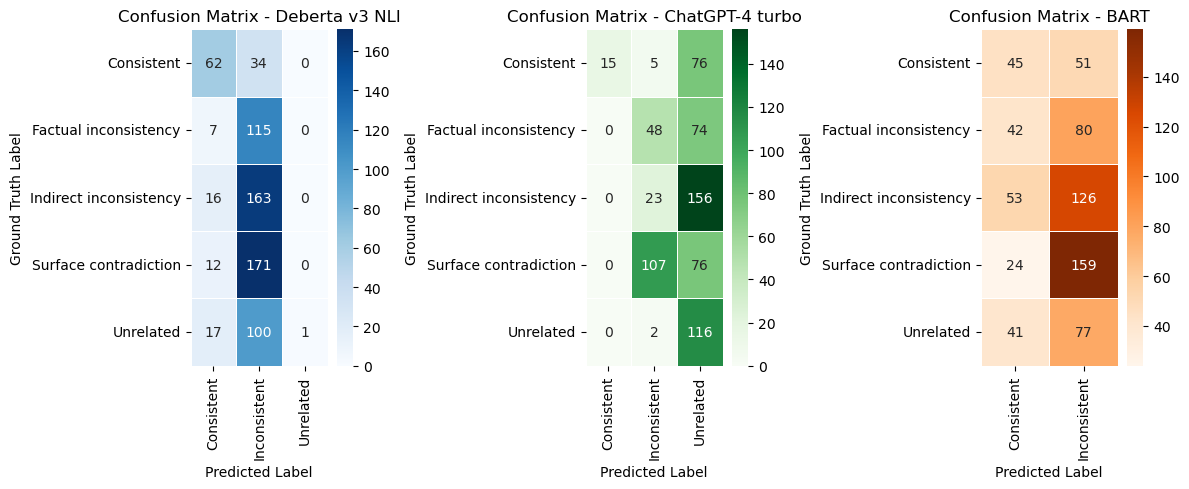

In [10]:


# Function to create confusion matrix DataFrame
def create_confusion_matrix(predictions):
    conf_matrix = Counter(predictions)
    ground_truths = sorted(set(gt for gt, _ in conf_matrix.keys()))
    predicted_labels = sorted(set(pred for _, pred in conf_matrix.keys()))
    
    df = pd.DataFrame(0, index=ground_truths, columns=predicted_labels)
    for (gt, pred), count in conf_matrix.items():
        df.loc[gt, pred] = count
    return df

# Create confusion matrices
df1 = create_confusion_matrix(ground_truth_vs_prediction_NLI_all['deberta'])
df2 = create_confusion_matrix(ground_truth_vs_prediction_NLI_all['chatgpt'])
df3 = create_confusion_matrix(ground_truth_vs_prediction_NLI_all['bart'])

# Plot subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.heatmap(df1, annot=True, cmap="Blues", fmt="d", linewidths=0.5, ax=axes[0])
axes[0].set_title("Confusion Matrix - Deberta v3 NLI")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Ground Truth Label")

sns.heatmap(df2, annot=True, cmap="Greens", fmt="d", linewidths=0.5, ax=axes[1])
axes[1].set_title("Confusion Matrix - ChatGPT-4 turbo")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("Ground Truth Label")


sns.heatmap(df3, annot=True, cmap="Oranges", fmt="d", linewidths=0.5, ax=axes[2])
axes[2].set_title("Confusion Matrix - BART")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("Ground Truth Label")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=1)  # Adjust horizontal space

plt.tight_layout()
plt.savefig(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\nli_models\confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

### F1 scores visualized per class + synthetic bootstrap

In [21]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\precision_per_model_type_majority_LLM.pkl", 'rb') as f:
    precision_per_model_type_majority_LLM = pickle.load(f)

In [22]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\precision_per_model_type_5_runs.pkl", 'rb') as f:
    precision_per_model_type_5_runs = pickle.load(f)

In [23]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\f1_score_per_model_type_majority_LLM.pkl', 'rb') as f:
    f1_score_per_model_type_majority_LLM = pickle.load(f)

In [24]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\f1_score_per_model_type_5_runs.pkl', 'rb') as f:
    f1_score_per_model_type_5_runs = pickle.load(f)

In [25]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\recall_per_model_type_majority_LLM.pkl', 'rb') as f:
    recall_per_model_type_majority_LLM = pickle.load(f)

In [26]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\recall_per_model_type_5_runs.pkl', 'rb') as f:
    recall_per_model_type_5_runs = pickle.load(f)

In [9]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\recall_per_model_type_5_runs_3_classes.pkl', 'rb') as f:
    recall_per_model_type_5_runs_3_classes = pickle.load(f)
    
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\recall_per_model_type_majority_LLM_3_classes.pkl', 'rb') as f:
    recall_per_model_type_majority_LLM_3_classes = pickle.load(f)
    
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\f1_score_per_model_type_5_runs_3_classes.pkl', 'rb') as f:
    f1_score_per_model_type_5_runs_3_classes = pickle.load(f)
    
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\f1_score_per_model_type_majority_LLM_3_classes.pkl', 'rb') as f:
    f1_score_per_model_type_majority_LLM_3_classes = pickle.load(f)
    
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\precision_per_model_type_5_runs_3_classes.pkl", 'rb') as f:
    precision_per_model_type_5_runs_3_classes = pickle.load(f)
    
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\precision_per_model_type_majority_LLM_3_classes.pkl", 'rb') as f:
    precision_per_model_type_majority_LLM_3_classes = pickle.load(f)

In [10]:
data_precision_majority_3_classes = dict()
for model in precision_per_model_type_majority_LLM_3_classes:
    data_precision_majority_3_classes[model] = dict()
    for class_name in classes_3:
        data_precision_majority_3_classes[model][class_name] = precision_per_model_type_majority_LLM_3_classes[model][class_name]['precision']
    data_precision_majority_3_classes[model]['total'] = precision_per_model_type_majority_LLM_3_classes[model]['total']
    
data_precision_5_runs_3_classes = dict()
for model in precision_per_model_type_5_runs_3_classes:
    print(model)
    data_precision_5_runs_3_classes[model] = dict()
    for class_name in classes_3:
        data_precision_5_runs_3_classes[model][class_name] = precision_per_model_type_5_runs_3_classes[model][class_name]['precision']
    data_precision_5_runs_3_classes[model]['total'] = precision_per_model_type_5_runs_3_classes[model]['total']

Humans
ChatGPT-4
ChatGPT-3.5
LLaMA 8B
LLaMA 70B
bootstrap


In [21]:
data_precision_majority = dict()
for model in precision_per_model_type_majority_LLM:
    data_precision_majority[model] = dict()
    for class_name in classes_5:
        data_precision_majority[model][class_name] = precision_per_model_type_majority_LLM[model][class_name]['precision']
    data_precision_majority[model]['total'] = precision_per_model_type_majority_LLM[model]['total']

In [25]:
data_precision_5_runs = dict()
for model in precision_per_model_type_5_runs:
    data_precision_5_runs[model] = dict()
    for class_name in classes_5:
        data_precision_5_runs[model][class_name] = precision_per_model_type_5_runs[model][class_name]['precision']
    data_precision_5_runs[model]['total'] = precision_per_model_type_5_runs[model]['total']

In [26]:
data_recall_5_runs = dict()
for model in recall_per_model_type_5_runs:
    data_recall_5_runs[model] = dict()
    for class_name in classes_5:
        data_recall_5_runs[model][class_name] = recall_per_model_type_5_runs[model][class_name]['recall']
    data_recall_5_runs[model]['total'] = recall_per_model_type_5_runs[model]['total']

In [27]:
data_recall_majority = dict()
for model in recall_per_model_type_majority_LLM:
    data_recall_majority[model] = dict()
    for class_name in classes_5:
        data_recall_majority[model][class_name] = recall_per_model_type_majority_LLM[model][class_name]['recall']
    data_recall_majority[model]['total'] = recall_per_model_type_majority_LLM[model]['total']

In [11]:
data_recall_5_runs_3_classes = dict()
for model in recall_per_model_type_5_runs_3_classes:
    data_recall_5_runs_3_classes[model] = dict()
    for class_name in classes_3:
        data_recall_5_runs_3_classes[model][class_name] = recall_per_model_type_5_runs_3_classes[model][class_name]['recall']
    data_recall_5_runs_3_classes[model]['total'] = recall_per_model_type_5_runs_3_classes[model]['total']
    
data_recall_majority_3_classes = dict()
for model in recall_per_model_type_majority_LLM_3_classes:
    data_recall_majority_3_classes[model] = dict()
    for class_name in classes_3:
        data_recall_majority_3_classes[model][class_name] = recall_per_model_type_majority_LLM_3_classes[model][class_name]['recall']
    data_recall_majority_3_classes[model]['total'] = recall_per_model_type_majority_LLM_3_classes[model]['total']

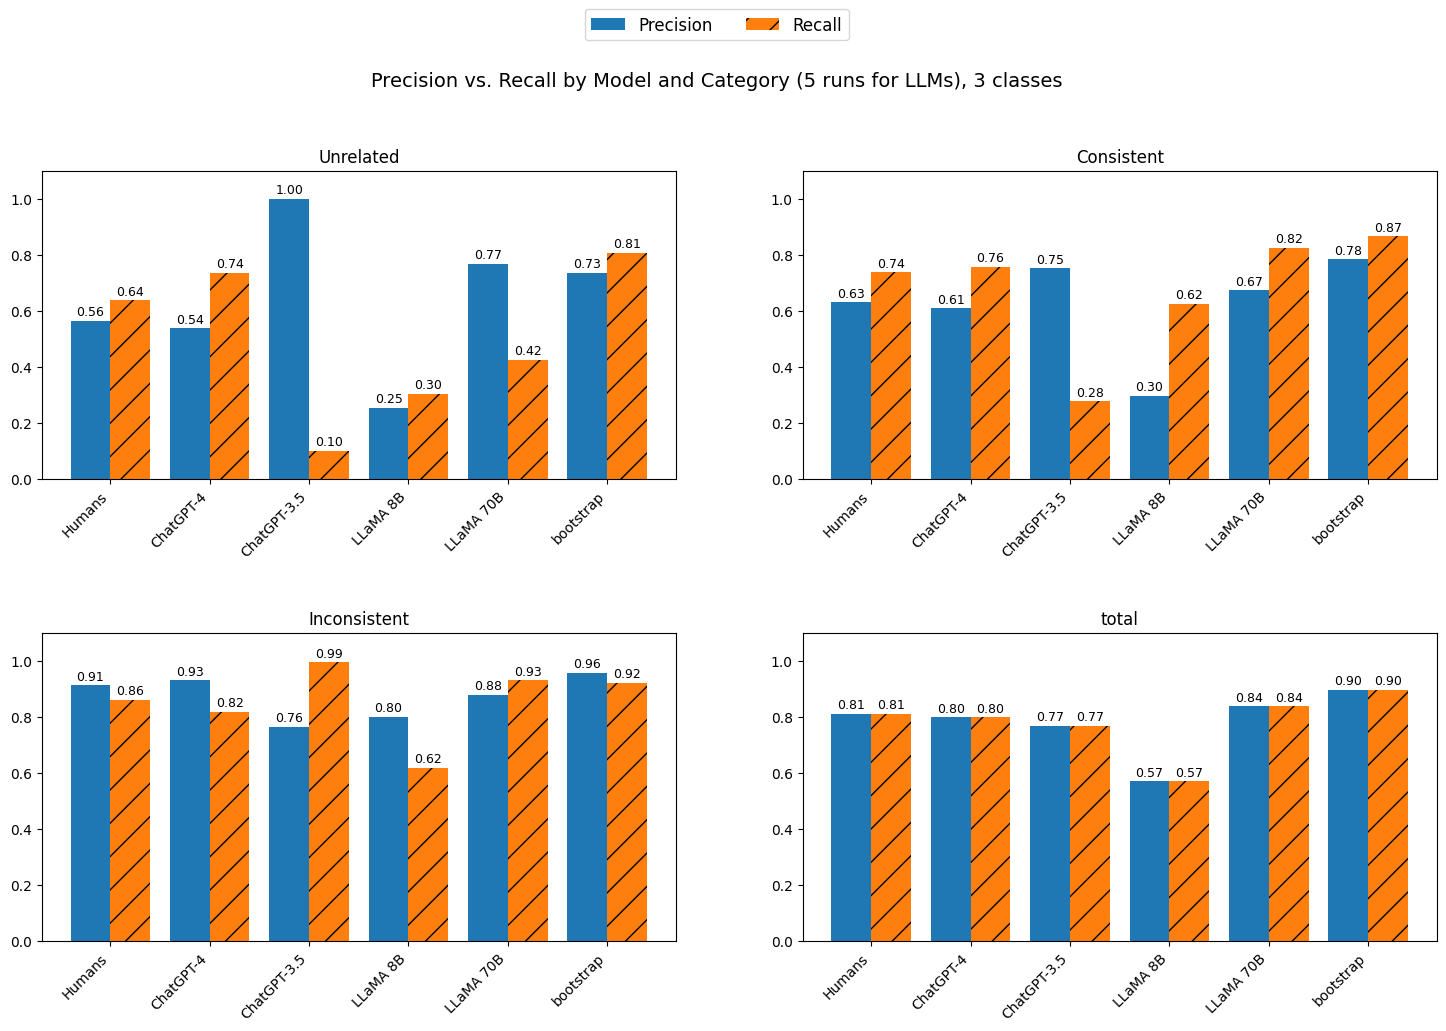

In [14]:
# Define models and classes
models = list(data_precision_5_runs_3_classes.keys())  
classes = list(next(iter(data_precision_5_runs_3_classes.values())).keys())  # Extract class names

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing
# Bar width and positions
bar_width = 0.4  
x = np.arange(len(models))  # X positions for models

# Colors
colors = ['#1f77b4', '#ff7f0e']  # Precision (blue) & Recall (orange)
patterns = ['', '/']  # Solid for precision, slashed for recall

# Loop through each class and create a subplot
for i, cls in enumerate(classes):
    ax = axes[i]
    precision_values = [data_precision_5_runs_3_classes[model][cls] for model in models]
    recall_values = [data_recall_5_runs_3_classes[model][cls] for model in models]

    # Plot bars side by side for precision and recall
    ax.bar(x - bar_width/2, precision_values, bar_width, label="Precision", color=colors[0], hatch=patterns[0])
    ax.bar(x + bar_width/2, recall_values, bar_width, label="Recall", color=colors[1], hatch=patterns[1])

    # Formatting
    ax.set_title(cls, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
    ax.set_ylim(0, 1.1)  # Keep all bars within [0,1] for consistency

    # Show values on top of bars
    for j, (p, r) in enumerate(zip(precision_values, recall_values)):
        ax.text(j - bar_width/2, p + 0.02, f"{p:.2f}", ha='center', fontsize=9)
        ax.text(j + bar_width/2, r + 0.02, f"{r:.2f}", ha='center', fontsize=9)

# Hide the empty 6th subplot

# Add legend outside
fig.legend(["Precision", "Recall"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
plt.suptitle("Precision vs. Recall by Model and Category (5 runs for LLMs), 3 classes", fontsize=14)
plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust spacing

plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\precision_vs_recall_5_runs_3_classes.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


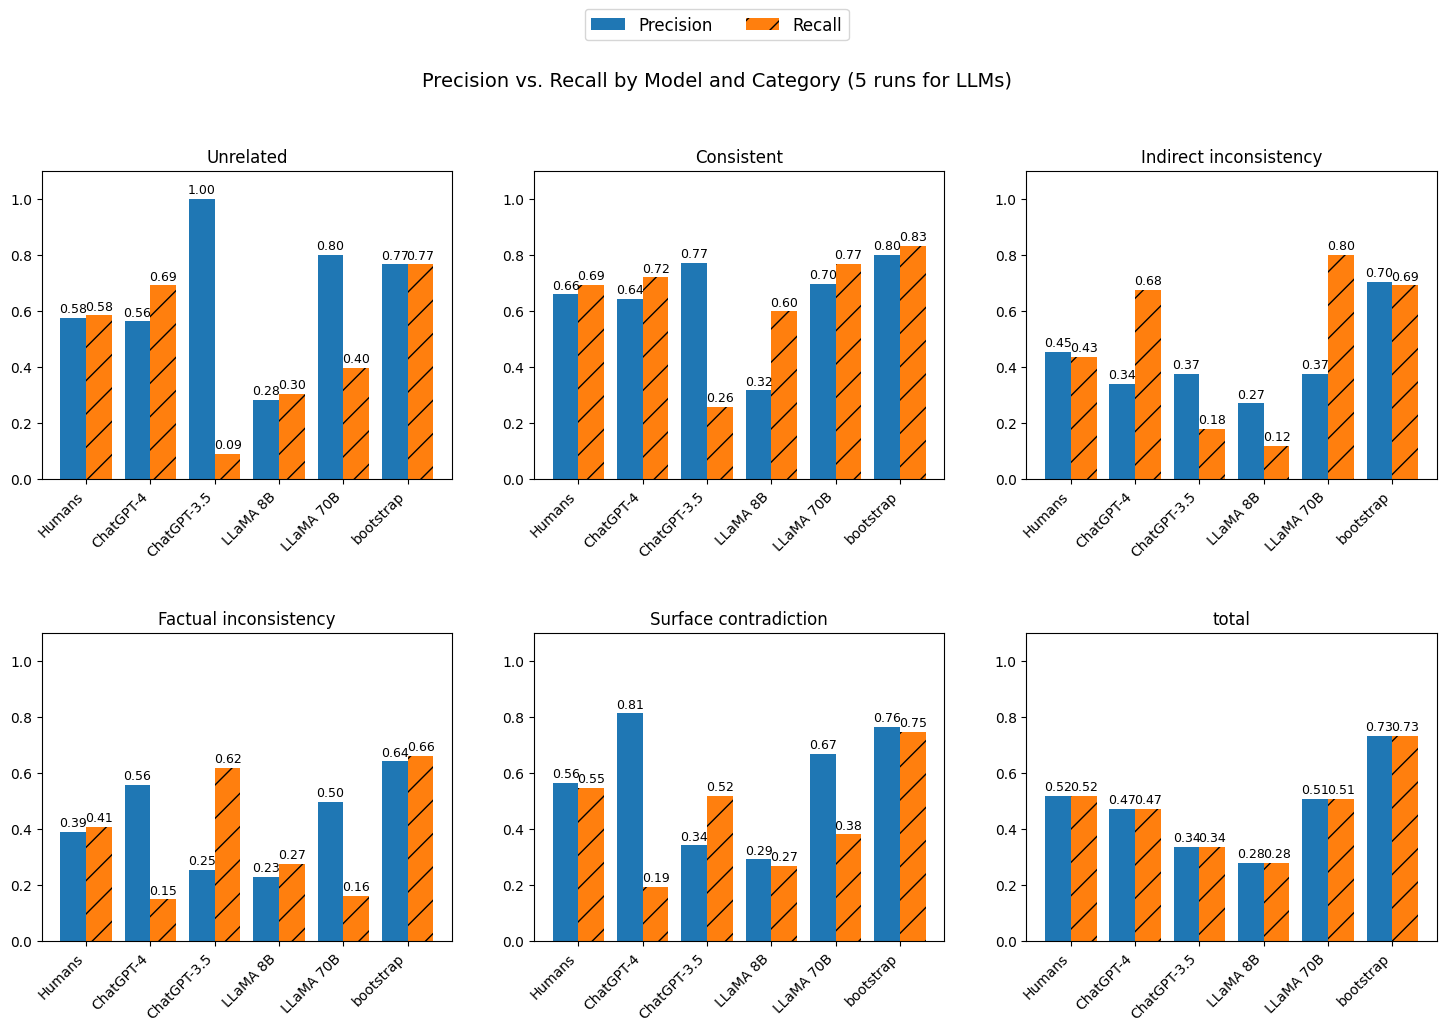

In [52]:
# Define models and classes
models = list(data_precision_5_runs.keys())  
classes = list(next(iter(data_precision_5_runs.values())).keys())  # Extract class names

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing
# Bar width and positions
bar_width = 0.4  
x = np.arange(len(models))  # X positions for models

# Colors
colors = ['#1f77b4', '#ff7f0e']  # Precision (blue) & Recall (orange)
patterns = ['', '/']  # Solid for precision, slashed for recall

# Loop through each class and create a subplot
for i, cls in enumerate(classes):
    ax = axes[i]
    precision_values = [data_precision_5_runs[model][cls] for model in models]
    recall_values = [data_recall_5_runs[model][cls] for model in models]

    # Plot bars side by side for precision and recall
    ax.bar(x - bar_width/2, precision_values, bar_width, label="Precision", color=colors[0], hatch=patterns[0])
    ax.bar(x + bar_width/2, recall_values, bar_width, label="Recall", color=colors[1], hatch=patterns[1])

    # Formatting
    ax.set_title(cls, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
    ax.set_ylim(0, 1.1)  # Keep all bars within [0,1] for consistency

    # Show values on top of bars
    for j, (p, r) in enumerate(zip(precision_values, recall_values)):
        ax.text(j - bar_width/2, p + 0.02, f"{p:.2f}", ha='center', fontsize=9)
        ax.text(j + bar_width/2, r + 0.02, f"{r:.2f}", ha='center', fontsize=9)

# Hide the empty 6th subplot

# Add legend outside
fig.legend(["Precision", "Recall"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
plt.suptitle("Precision vs. Recall by Model and Category (5 runs for LLMs)", fontsize=14)
plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust spacing

plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\precision_vs_recall_5_runs.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


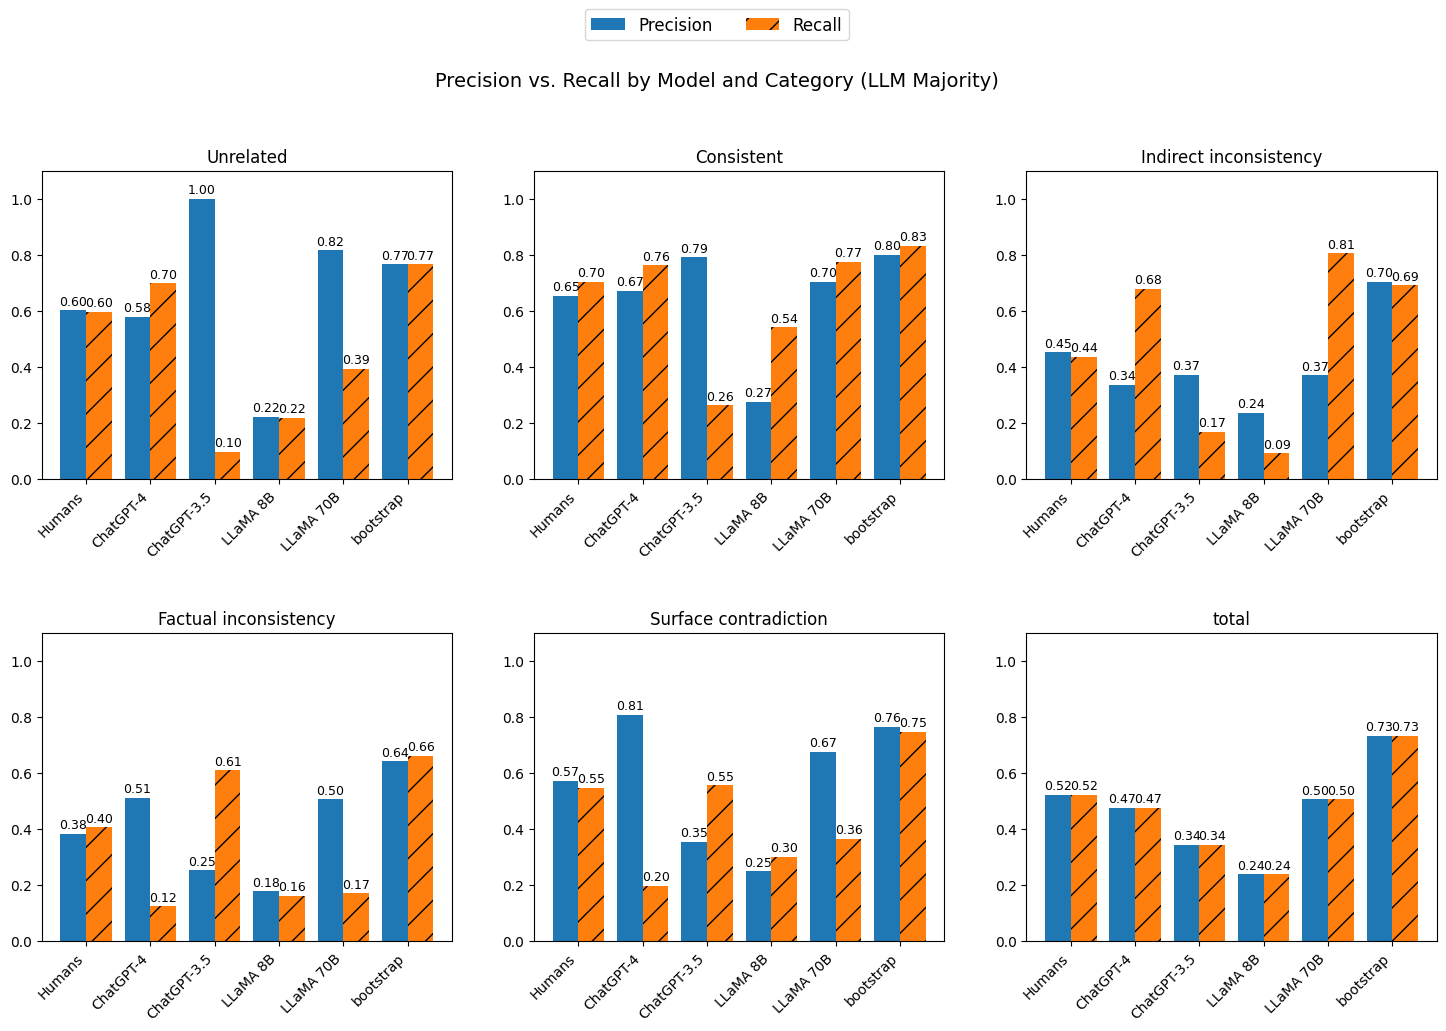

In [51]:
# Define models and classes
models = list(data_precision_majority.keys())  
classes = list(next(iter(data_precision_majority.values())).keys())  # Extract class names

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing
# Bar width and positions
bar_width = 0.4  
x = np.arange(len(models))  # X positions for models

# Colors
colors = ['#1f77b4', '#ff7f0e']  # Precision (blue) & Recall (orange)
patterns = ['', '/']  # Solid for precision, slashed for recall

# Loop through each class and create a subplot
for i, cls in enumerate(classes):
    ax = axes[i]
    precision_values = [data_precision_majority[model][cls] for model in models]
    recall_values = [data_recall_majority[model][cls] for model in models]

    # Plot bars side by side for precision and recall
    ax.bar(x - bar_width/2, precision_values, bar_width, label="Precision", color=colors[0], hatch=patterns[0])
    ax.bar(x + bar_width/2, recall_values, bar_width, label="Recall", color=colors[1], hatch=patterns[1])

    # Formatting
    ax.set_title(cls, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
    ax.set_ylim(0, 1.1)  # Keep all bars within [0,1] for consistency

    # Show values on top of bars
    for j, (p, r) in enumerate(zip(precision_values, recall_values)):
        ax.text(j - bar_width/2, p + 0.02, f"{p:.2f}", ha='center', fontsize=9)
        ax.text(j + bar_width/2, r + 0.02, f"{r:.2f}", ha='center', fontsize=9)

# Hide the empty 6th subplot

# Add legend outside
fig.legend(["Precision", "Recall"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
plt.suptitle("Precision vs. Recall by Model and Category (LLM Majority)", fontsize=14)
plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust spacing

plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\precision_vs_recall_LLM_majority.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\1728304128.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\1728304128.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\1728304128.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

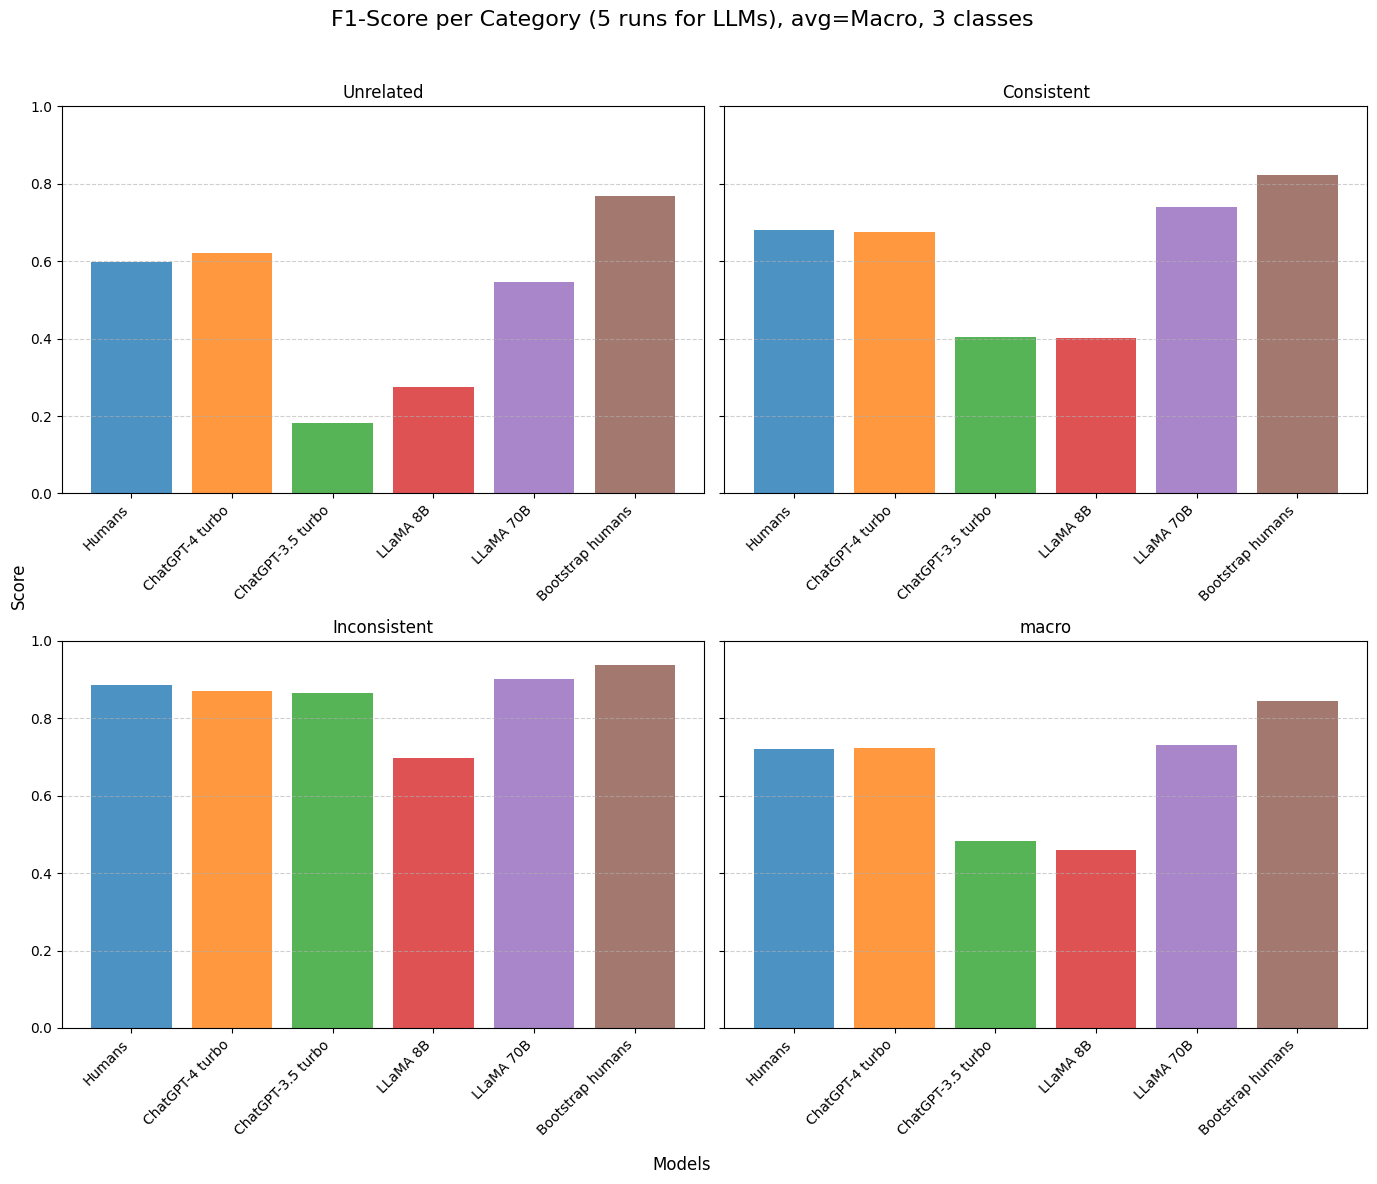

In [17]:
data = f1_score_per_model_type_5_runs_3_classes
# Extract model names and categories
models = list(data.keys())
categories = classes_3 + ['macro']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("F1-Score per Category (5 runs for LLMs), avg=Macro, 3 classes", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\f1_score_5_runs_3_classes.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\2738536958.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\2738536958.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\2738536958.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

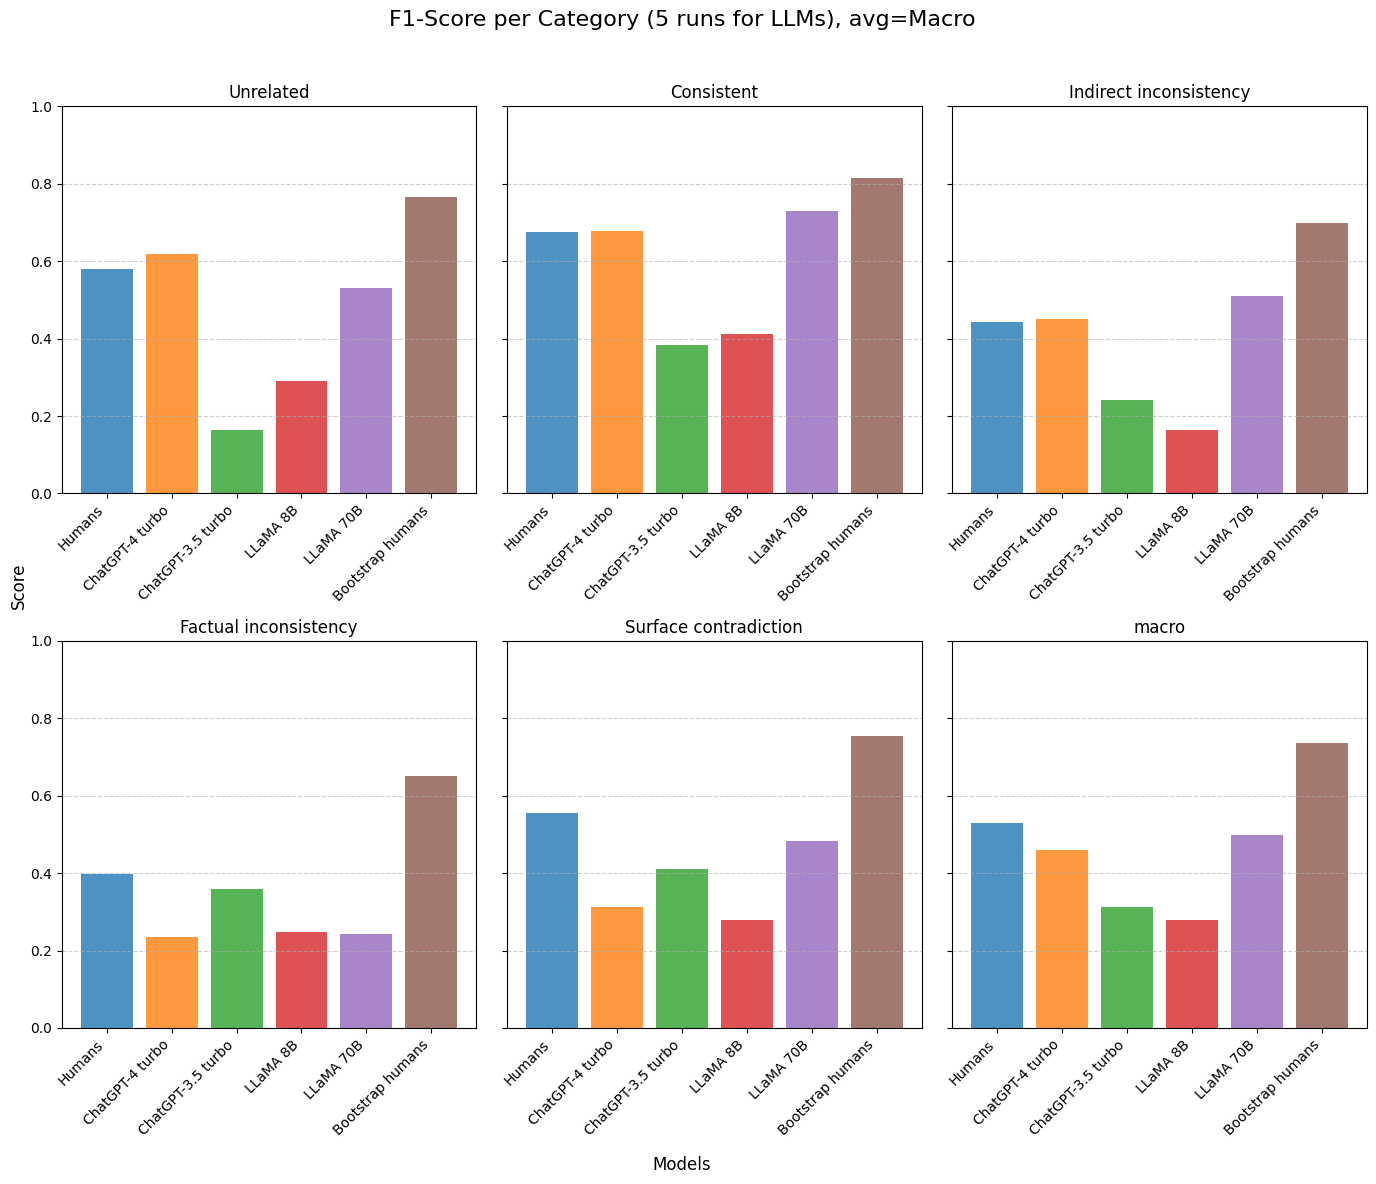

In [39]:
data = f1_score_per_model_type_5_runs
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['macro']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("F1-Score per Category (5 runs for LLMs), avg=Macro", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\f1_score_5_runs.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3282452428.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3282452428.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3282452428.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

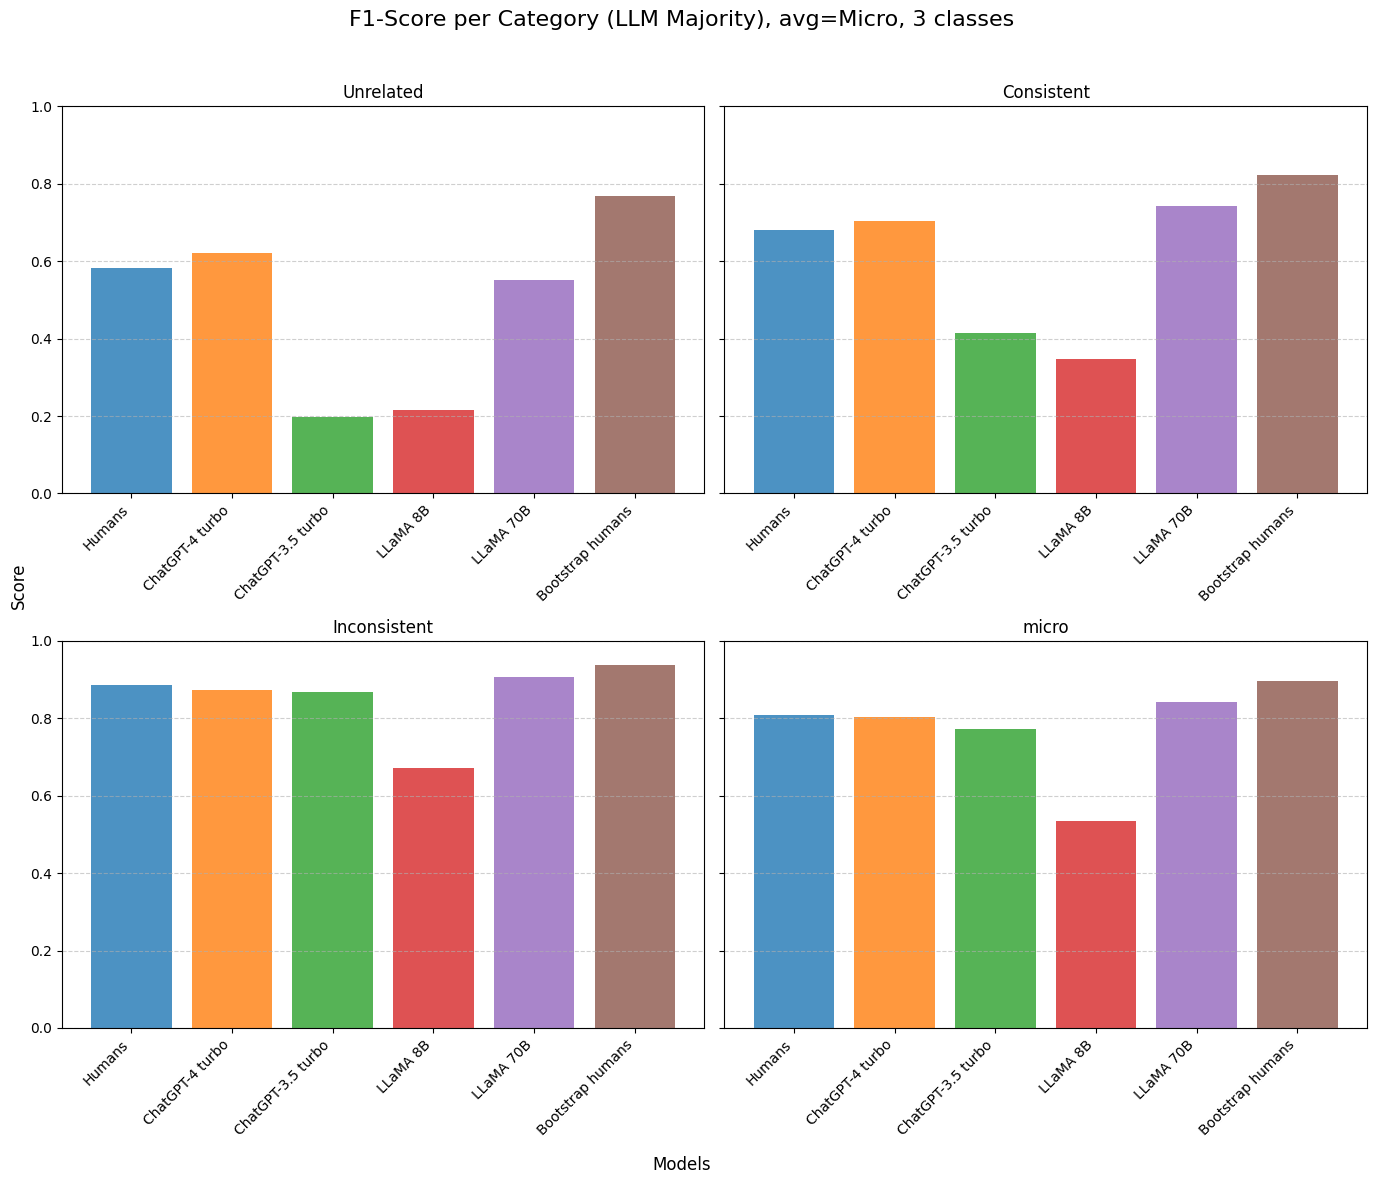

In [19]:
data = f1_score_per_model_type_majority_LLM_3_classes
# Extract model names and categories
models = list(data.keys())
categories = classes_3 + ['micro']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("F1-Score per Category (LLM Majority), avg=Micro, 3 classes", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\f1_score_LLM_majority_3_classes_micro.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3962949549.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3962949549.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3962949549.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

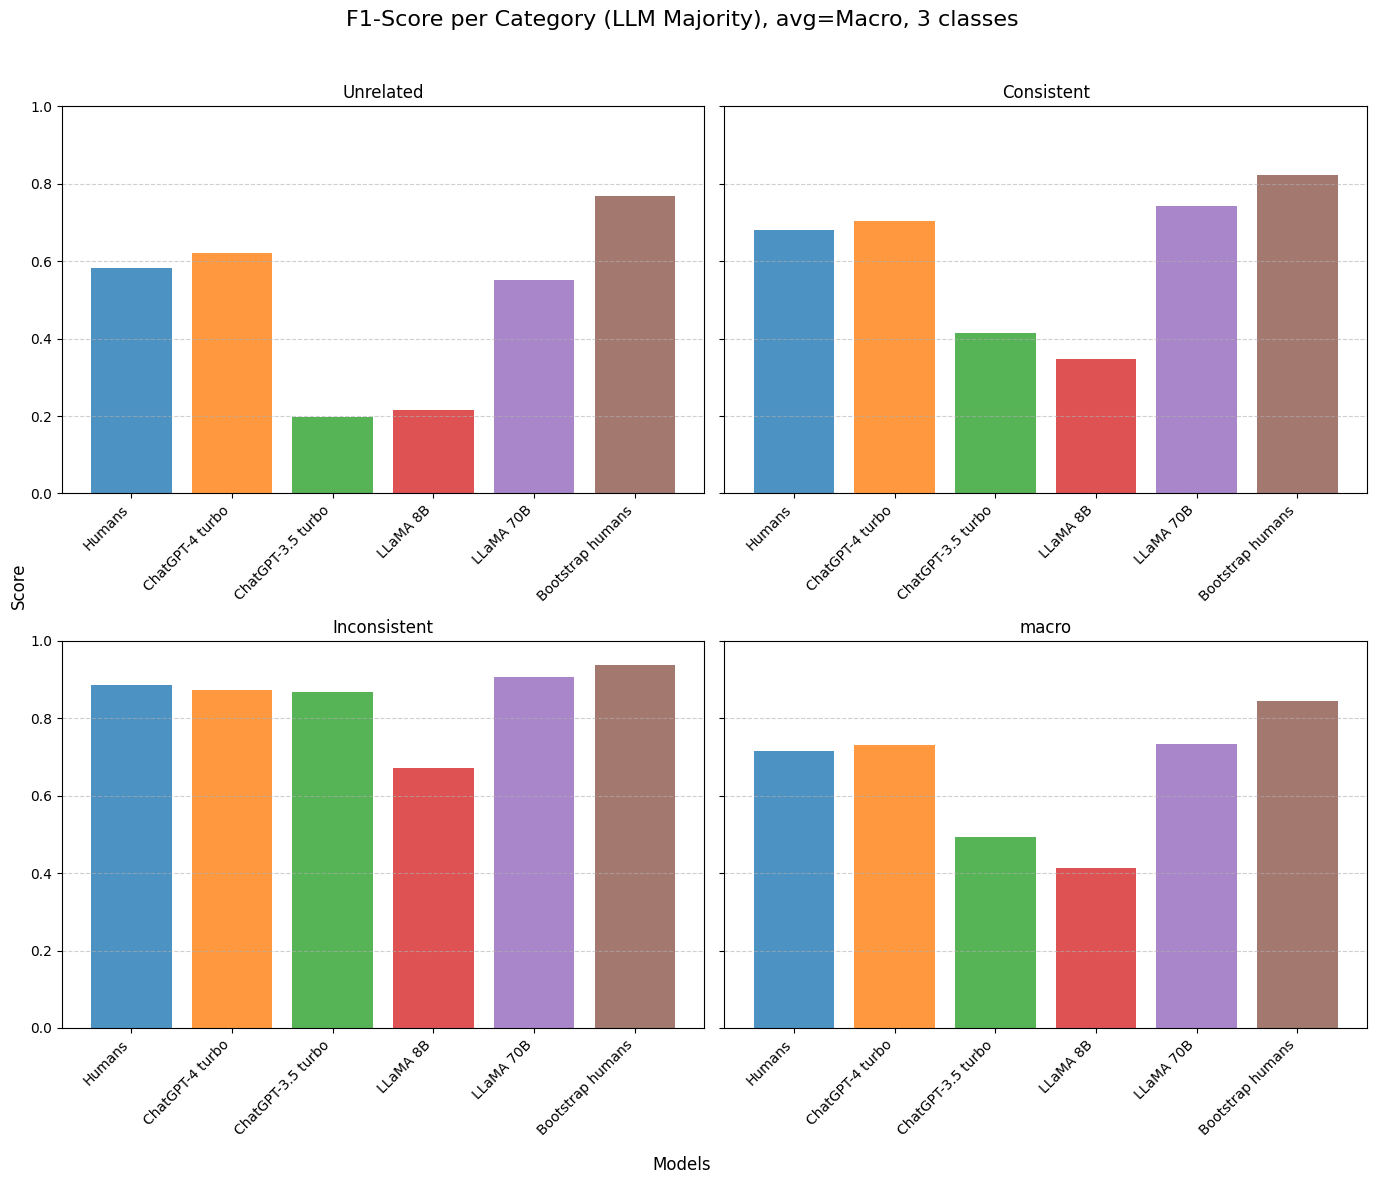

In [18]:
data = f1_score_per_model_type_majority_LLM_3_classes
# Extract model names and categories
models = list(data.keys())
categories = classes_3 + ['macro']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("F1-Score per Category (LLM Majority), avg=Macro, 3 classes", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\f1_score_LLM_majority_3_classes.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\2193290838.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\2193290838.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\2193290838.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

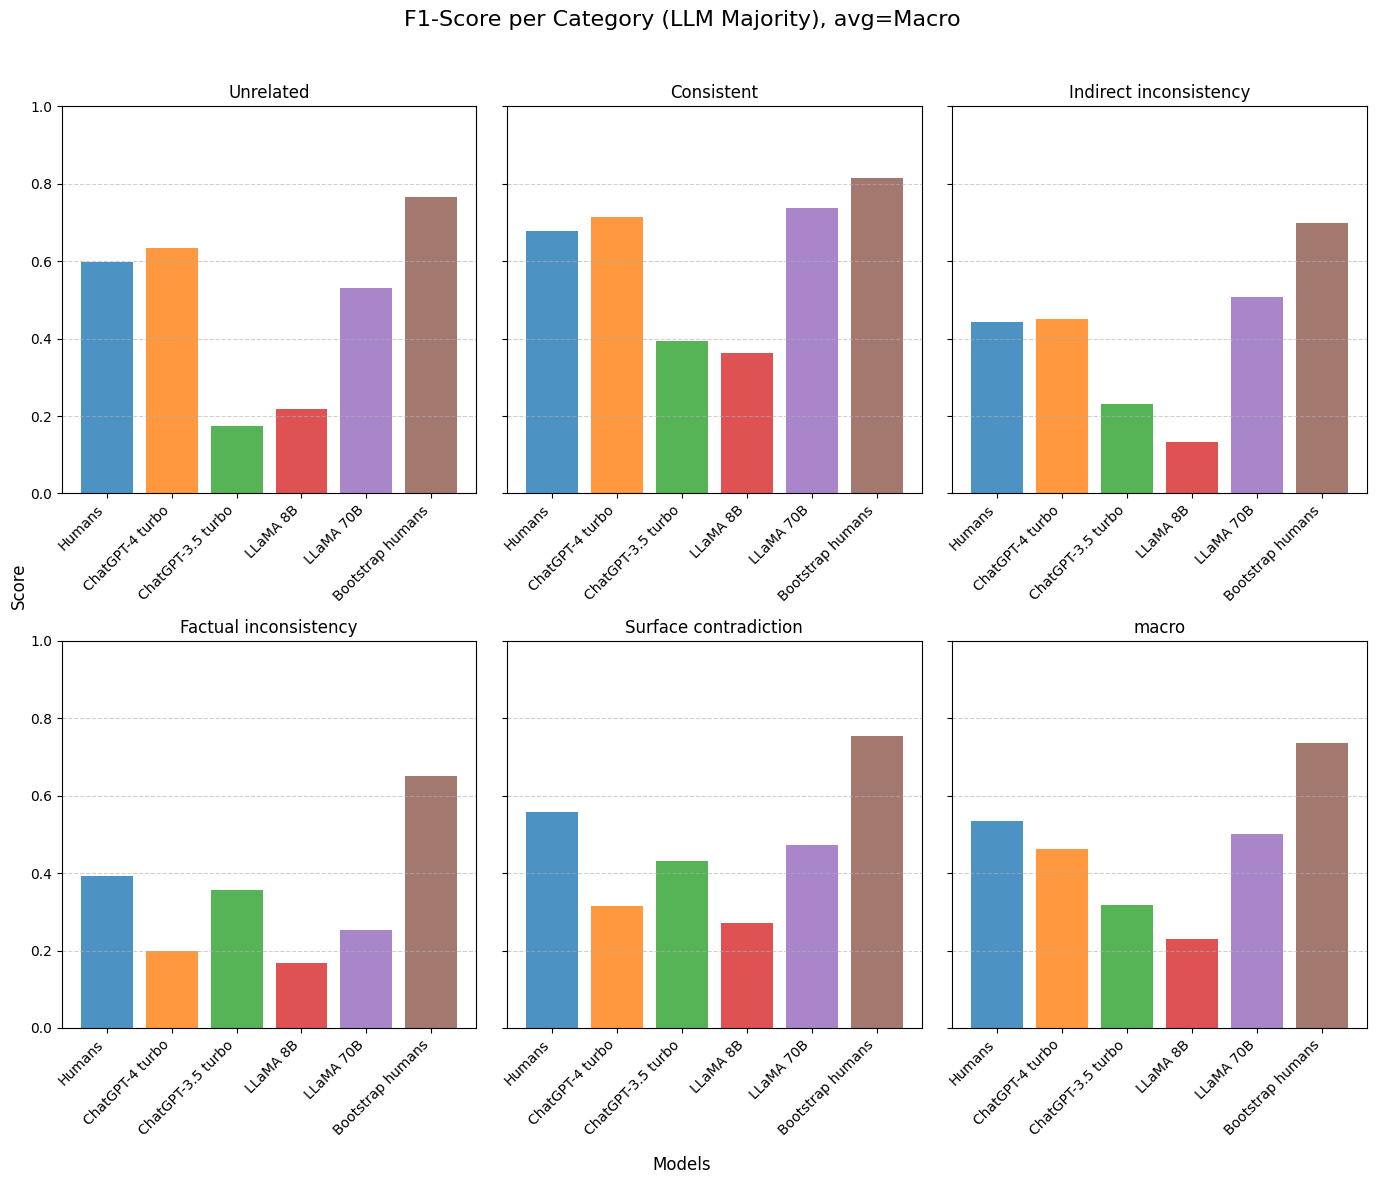

In [37]:
data = f1_score_per_model_type_majority_LLM
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['macro']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("F1-Score per Category (LLM Majority), avg=Macro", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\f1_score_LLM_majority.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3454791351.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3454791351.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_260316\3454791351.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

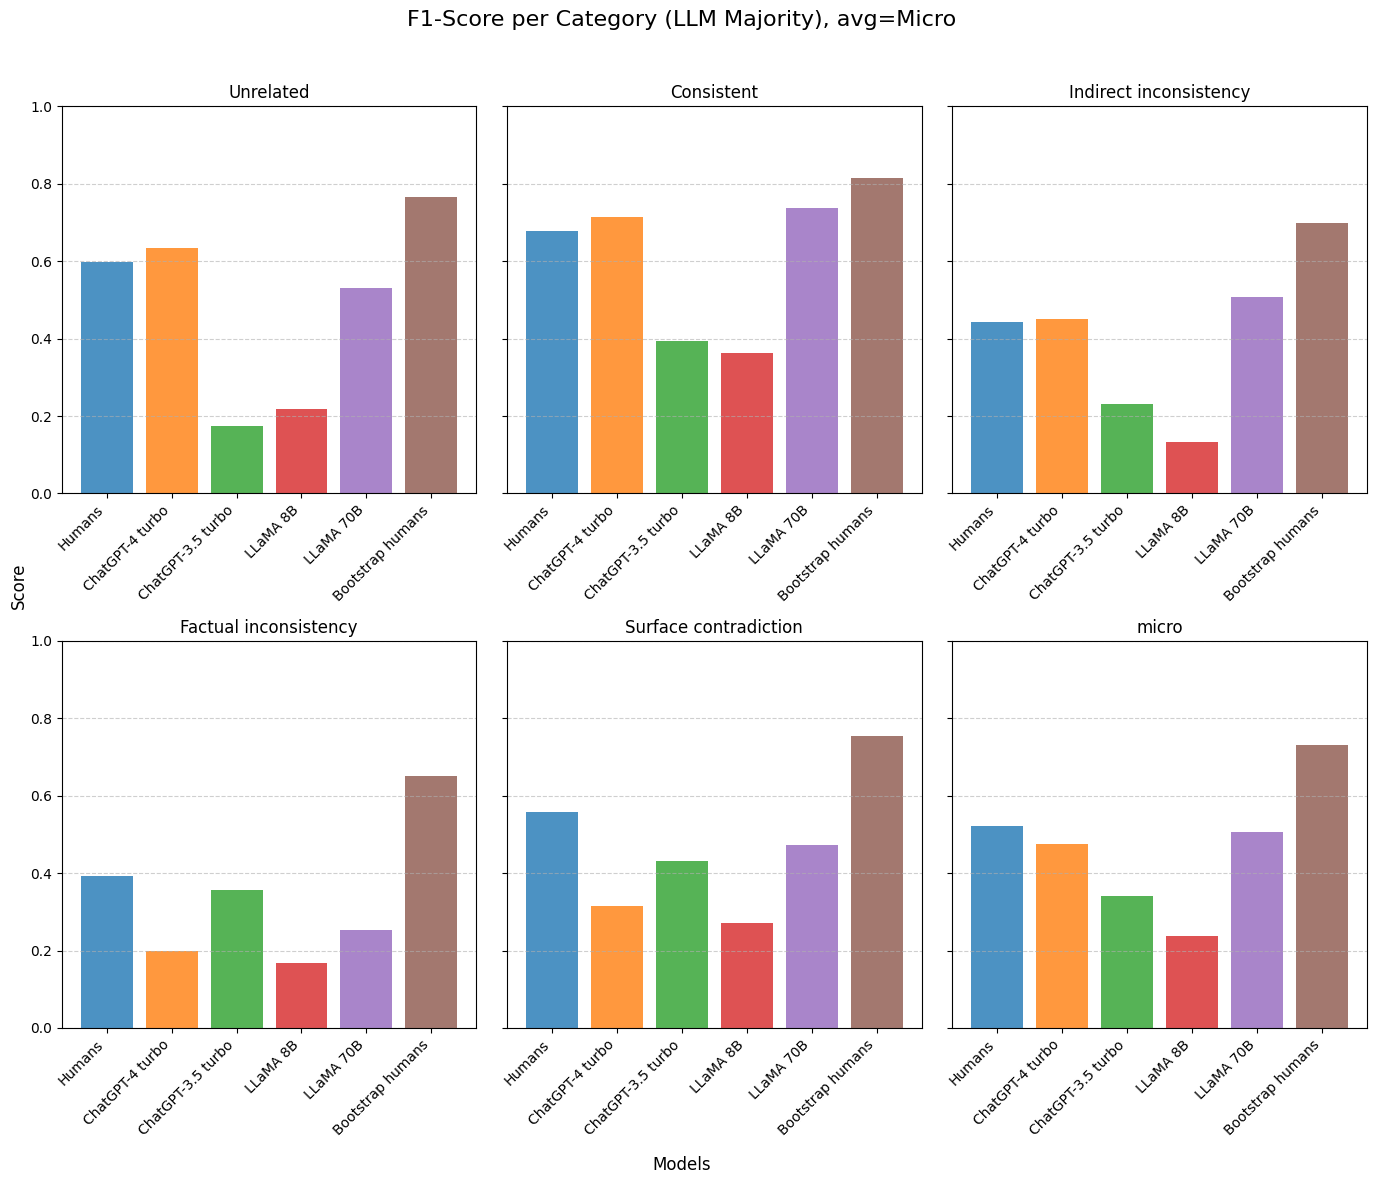

In [27]:
data = f1_score_per_model_type_majority_LLM
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['micro']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("F1-Score per Category (LLM Majority), avg=Micro", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\f1_score_LLM_majority_micro.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3950722077.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3950722077.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3950722077.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

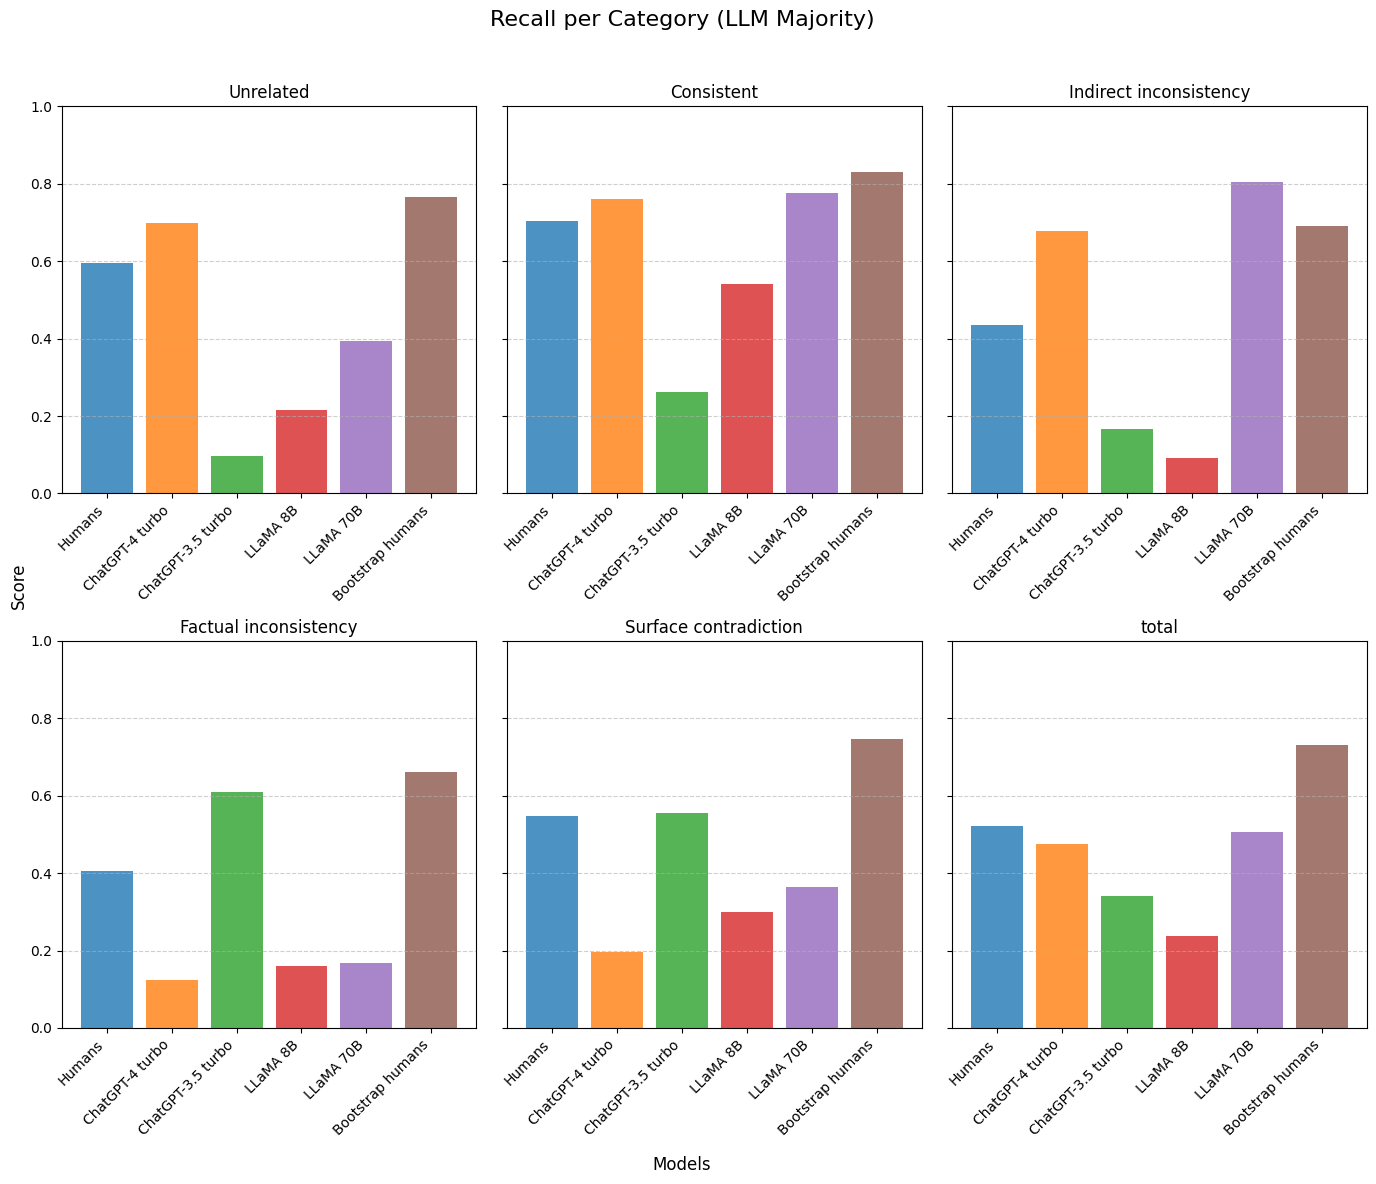

In [36]:
data = data_recall_majority
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['total']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("Recall per Category (LLM Majority)", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\recall_LLM_majority.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3519114473.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3519114473.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3519114473.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

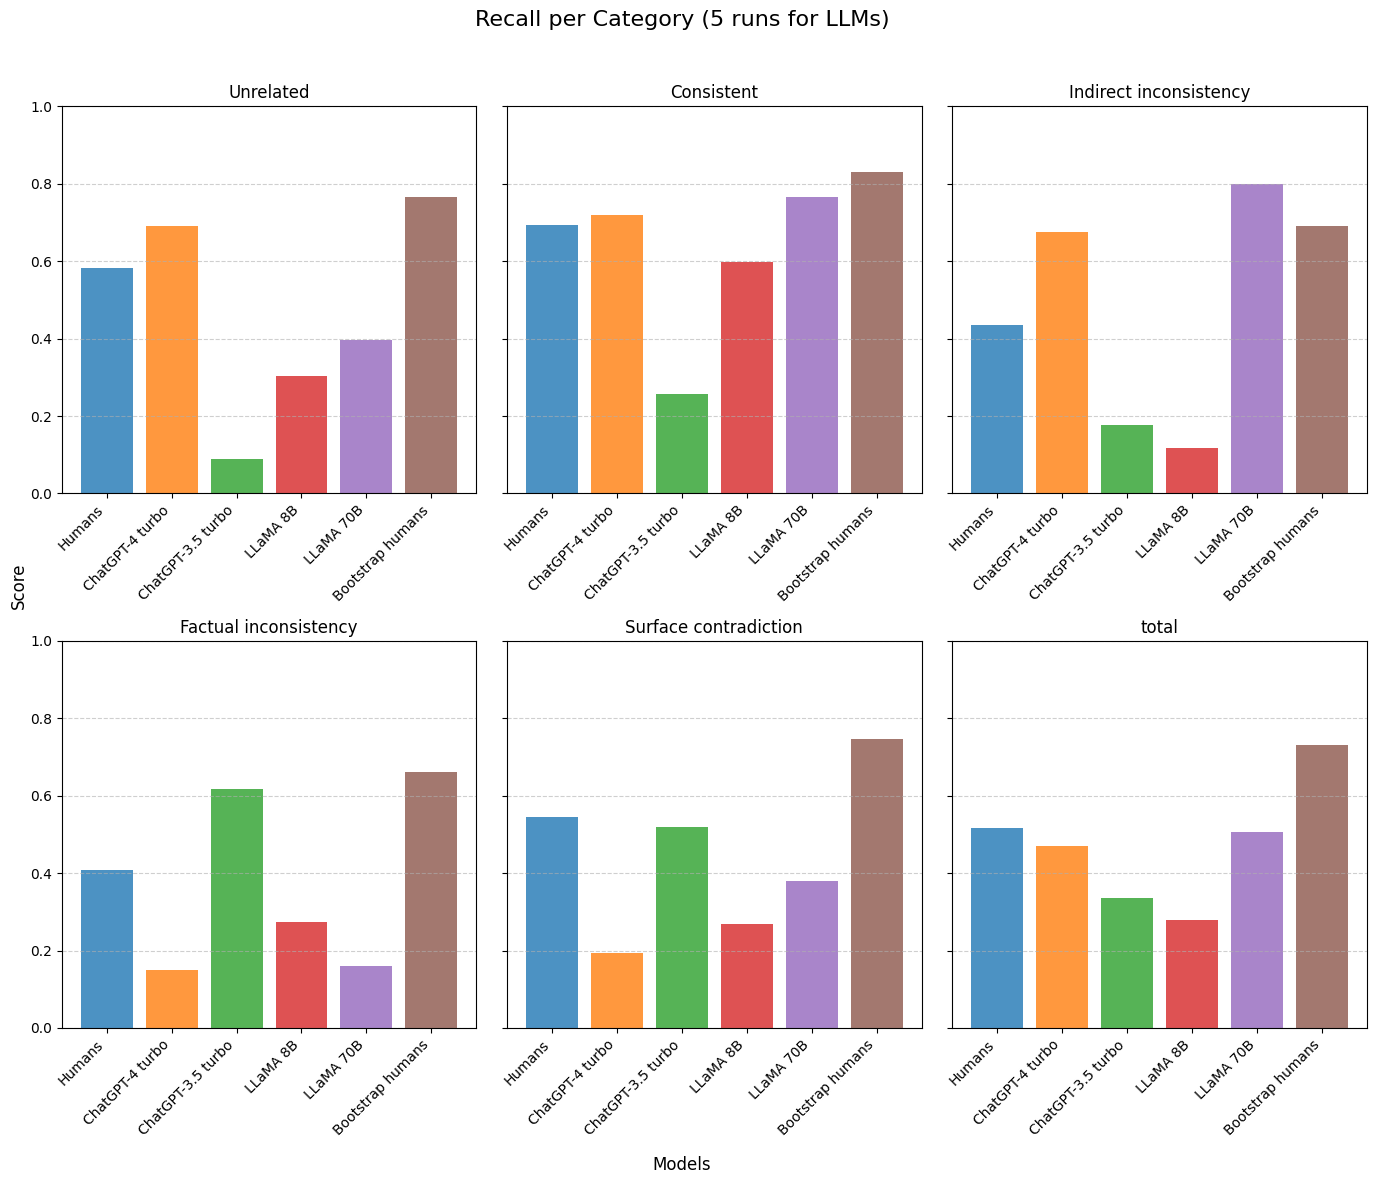

In [35]:
data = data_recall_5_runs
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['total']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("Recall per Category (5 runs for LLMs)", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\recall_5_runs.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3773211300.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3773211300.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3773211300.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

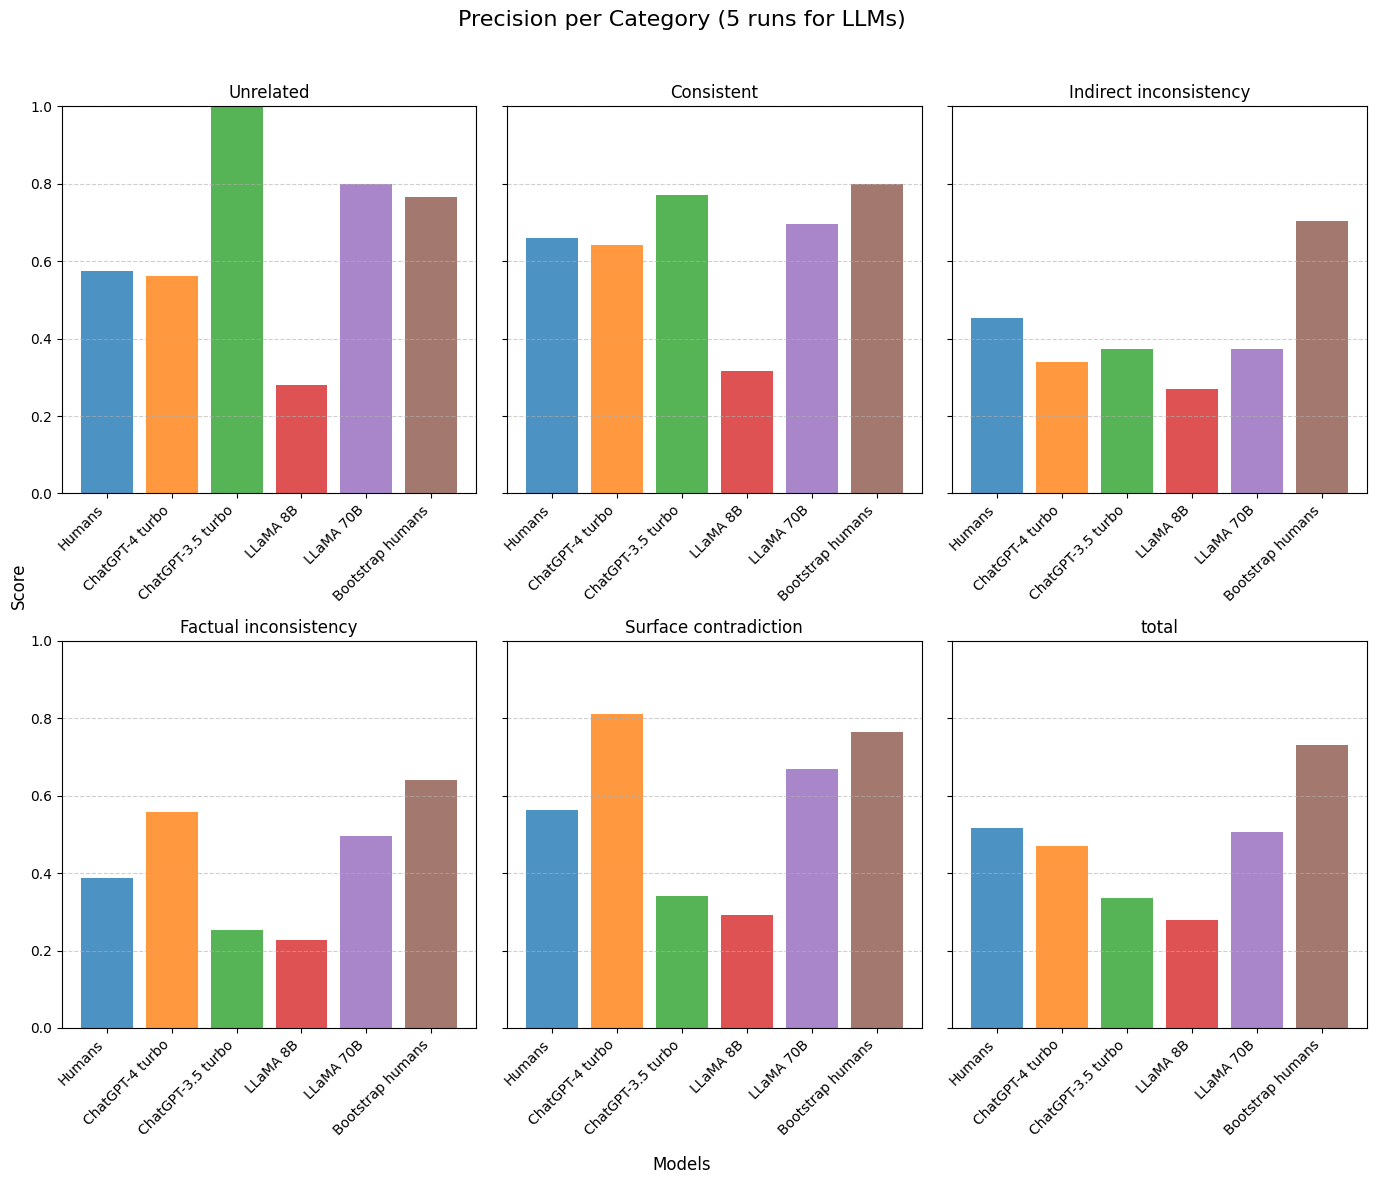

In [34]:
data = data_precision_5_runs
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['total']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("Precision per Category (5 runs for LLMs)", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\precision_5_runs.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3241160918.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3241160918.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
C:\Users\Nursulu_1\AppData\Local\Temp\ipykernel_232844\3241160918.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', '

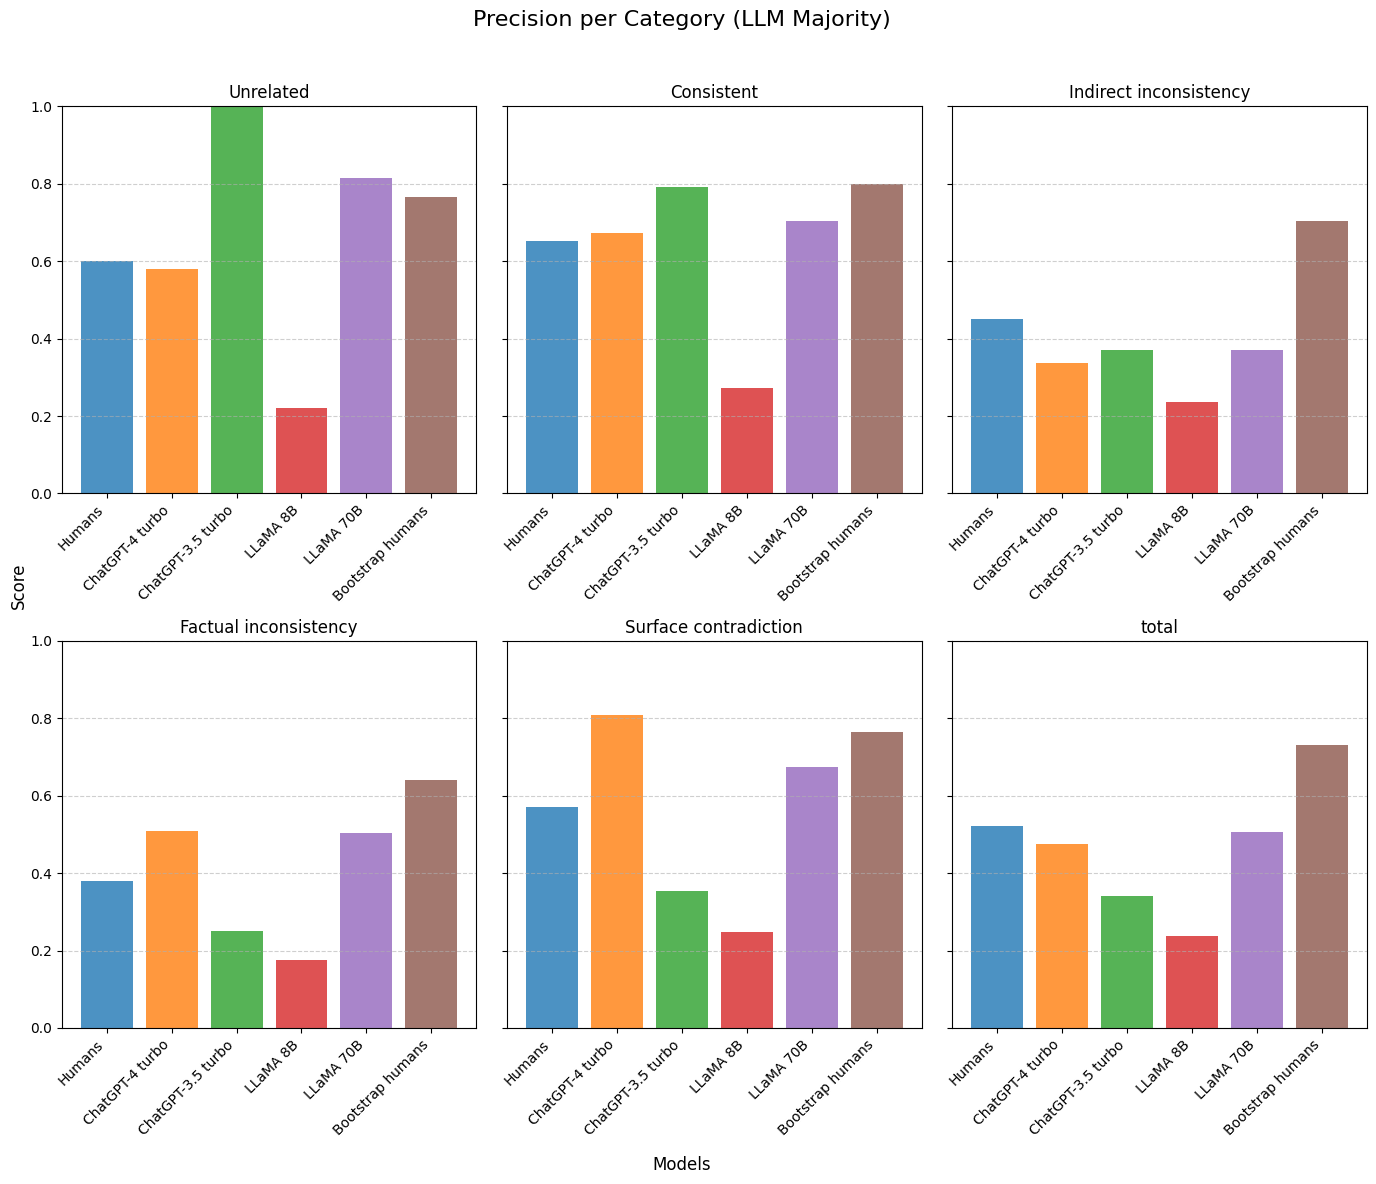

In [33]:
data = data_precision_majority
# Extract model names and categories
models = list(data.keys())
categories = classes_5 + ['total']

# Prepare values for each category
values = {cat: [data[model].get(cat, 0) for model in models] for cat in categories}

# Set up subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12), sharey=True)

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each category separately in a 2-row layout
for i, cat in enumerate(categories):
    ax = axes[i // 3, i % 3]  # Calculate row & column index
    ax.bar(models, values[cat], color=colors, alpha=0.8)
    ax.set_title(cat, fontsize=12)
    ax.set_xticklabels(['Humans', 'ChatGPT-4 turbo', 'ChatGPT-3.5 turbo', 'LLaMA 8B', 'LLaMA 70B', 'Bootstrap humans'], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)  # Keep consistent Y-axis scale
    ax.grid(axis="y", linestyle="--", alpha=0.6)  # Add grid for better readability

# Add common labels
fig.suptitle("Precision per Category (LLM Majority)", fontsize=16)
fig.supxlabel("Models", fontsize=12)
fig.supylabel("Score", fontsize=12)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the title
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\comparison_barplots\precision_LLM_majority.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [8]:
bootstrap_f1_scores

{'total': 0.7389506575982552,
 'Unrelated': array([0.        , 0.        , 0.        , 0.        , 0.88220928]),
 'Consistent': array([0.90816563, 0.        , 0.        , 0.        , 0.        ]),
 'Indirect inconsistency': array([0.      , 0.      , 0.811517, 0.      , 0.      ]),
 'Factual inconsistency': array([0.       , 0.7991449, 0.       , 0.       , 0.       ]),
 'Surface contradiction': array([0.        , 0.        , 0.        , 0.85283514, 0.        ])}

In [9]:
model_human_f1_scores['bootstrap'] = bootstrap_f1_scores

In [21]:
np.mean([0.26241799, 0.34815516, 0.59435028, 0.65668449, 0.81546135])

0.535413854

In [ ]:
1456 tokens/query
700 x 2 = 1400 = rerun for 5 classes

2 models - GPT4 and GPT3.5 - 2800 times
$0.03 / session
gpt4: input $30.00 / 1M tokens, output $60.00 / 1M tokens.


gpt-4-turbo
$10.00 / 1M tokens
$30.00 / 1M tokens
 
gpt-3.5-turbo-instruct
$1.50 / 1M tokens
$2.00 / 1M tokens


input 1350 output 100

3 times for 5 classes + 2 models
1350 * 700 * 3
100 * 700  * 3 *

In [4]:
(1350 * 700 * 3 )/ 1000000 * 10
# input: 1350 tokens + 700 samples + 3 times + 2 models
# gpt 4 turbo

28.35

In [5]:
(1350 * 700 * 3 )/ 1000000 * 1.5
# input: 1350 tokens + 700 samples + 3 times + 2 models
# gpt 3.5 turbo instruct

4.2524999999999995

In [7]:
(100 * 700 * 3 )/ 1000000 * 30

# gpt 4 turbo output

6.3

In [8]:
(100 * 700 * 3 )/ 1000000 * 2

0.42

In [ ]:
100 * 700  * 3 * 2

In [5]:
1456 * 2800

4076800

In [53]:
df_gold

,Input,Answer,Confidence,All answers,Answer_3_classes,ChatGPT-4 5 classes,ChatGPT-4 3 classes,Model_agreement_with_human,model_agreement_with_human_3_classes,ChatGPT-3.5 5 classes,...,NLI_ChatGPT4_turbo,Avg_synthetic_agreement,LLaMA 8B 5 runs,LLaMA 70B 5 runs,Llama 8B majority,Llama 70B majority,ChatGPT-3.5 5 runs,ChatGPT-4 5 runs,ChatGPT-3.5 majority,ChatGPT-4 majority
0,Text 1: Motivated and confident workforce is a...,Indirect inconsistency,80.000,"['Indirect inconsistency', 'Indirect inconsist...",Inconsistent,Indirect inconsistency,Inconsistent,0.800000,1.000000,Factual inconsistency,...,Contradiction,1.0,"['Indirect inconsistency', 'Factual inconsiste...","['Indirect inconsistency', 'Indirect inconsist...",Indirect inconsistency,Indirect inconsistency,"['Factual inconsistency', 'Surface contradicti...","['Indirect inconsistency', 'Indirect inconsist...",Surface contradiction,Indirect inconsistency
1,Text 1: We want broad support for agriculture ...,Surface contradiction,60.000,"['Consistent', 'Surface contradiction', 'Surfa...",Inconsistent,Indirect inconsistency,Inconsistent,0.000000,0.800000,Surface contradiction,...,Contradiction,0.7,"['Factual inconsistency', 'Surface contradicti...","['Indirect inconsistency', 'Indirect inconsist...",Factual inconsistency,Indirect inconsistency,"['Surface contradiction', 'Factual inconsisten...","['Indirect inconsistency', 'Indirect inconsist...",Factual inconsistency,Indirect inconsistency
2,Text 1: There should be a €29 ticket for every...,Surface contradiction,80.000,"['Indirect inconsistency', 'Surface contradict...",Inconsistent,Indirect inconsistency,Inconsistent,0.200000,1.000000,Factual inconsistency,...,Contradiction,1.0,"['Factual inconsistency', 'Indirect inconsiste...","['Indirect inconsistency', 'Indirect inconsist...",Factual inconsistency,Indirect inconsistency,"['Factual inconsistency', 'Factual inconsisten...","['Indirect inconsistency', 'Indirect inconsist...",Factual inconsistency,Indirect inconsistency
3,Text 1: We support the implementation of pilot...,Unrelated,60.000,"['Indirect inconsistency', 'Unrelated', 'Factu...",Unrelated,Indirect inconsistency,Unrelated,0.200000,0.600000,Indirect inconsistency,...,Unrelated,0.7,"['Unrelated', 'Consistent', 'Consistent', 'Con...","['Indirect inconsistency', 'Indirect inconsist...",Consistent,Indirect inconsistency,"['Indirect inconsistency', 'Indirect inconsist...","['Unrelated', 'Unrelated', 'Unrelated', 'Unrel...",Indirect inconsistency,Unrelated
4,Text 1: We fully support the conversion of add...,Indirect inconsistency,83.333,"['Unrelated', 'Indirect inconsistency', 'Indir...",Inconsistent,Indirect inconsistency,Inconsistent,0.833333,0.833333,Factual inconsistency,...,Unrelated,1.0,"['Unrelated', 'Consistent', 'Consistent', 'Con...","['Indirect inconsistency', 'Indirect inconsist...",Consistent,Indirect inconsistency,"['Factual inconsistency', 'Factual inconsisten...","['Indirect inconsistency', 'Indirect inconsist...",Factual inconsistency,Indirect inconsistency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,"Text 1: To bolster the economy, a major focus...",Indirect inconsistency,60.000,"['Indirect inconsistency', 'Indirect inconsist...",Inconsistent,Factual inconsistency,Inconsistent,0.400000,1.000000,Surface contradiction,...,Unrelated,0.7,"['Unrelated', 'Factual inconsistency', 'Indire...","['Indirect inconsistency', 'Factual inconsiste...",Indirect inconsistency,Factual inconsistency,"['Surface contradiction', 'Factual inconsisten...","['Indirect inconsistency', 'Indirect inconsist...",Surface contradiction,Indirect inconsistency
694,Text 1: Students should have the free choice b...,Surface contradiction,60.000,"['Factual inconsistency', 'Factual inconsisten...",Inconsistent,Indirect inconsistency,Inconsistent,0.000000,1.000000,Surface contradiction,...,Contradiction,0.7,"['Factual inconsistency', 'Surface contradicti...","['Indirect inconsistency', 'Indirect inconsis

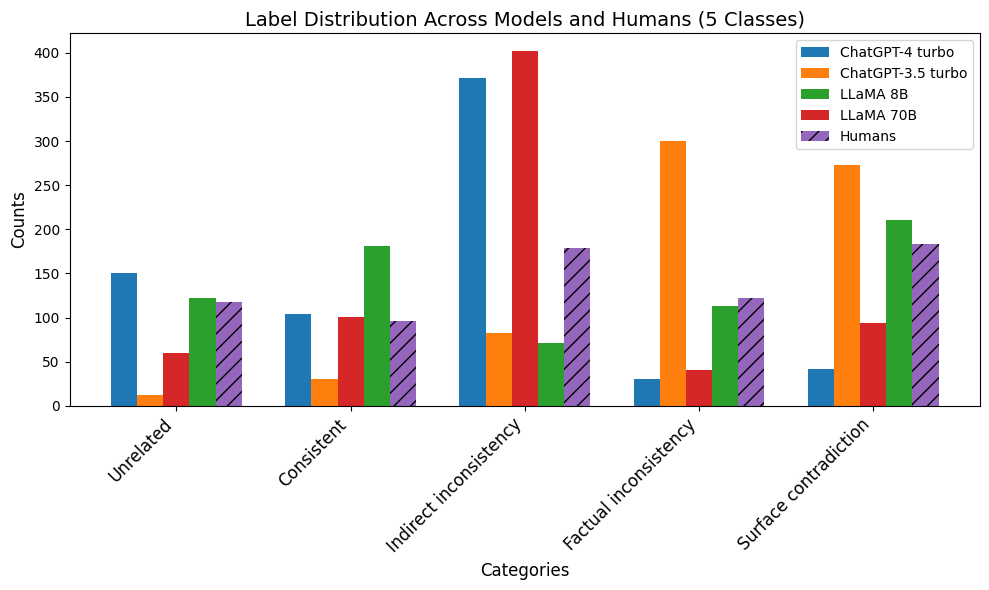

In [60]:
# Data for the graphs
labels = ['Unrelated', 'Consistent', 'Indirect inconsistency', 'Factual inconsistency',  'Surface contradiction']

chatgpt4_turbo_values = [Counter(df_gold['ChatGPT-4 majority'])[label] for label in labels]
chatgpt35_values = [Counter(df_gold['ChatGPT-3.5 majority'])[label] for label in labels]
llama_8b_values = [Counter(df_gold['Llama 8B majority'])[label] for label in labels]
llama_70b_values = [Counter(df_gold['Llama 70B majority'])[label] for label in labels]
human_values = [Counter(df_gold['Answer'])[label] for label in labels]
# chatgpt4_values = [127, 112, 352, 33, 74]
# chatgpt35_values = [10, 36, 96, 311, 245]
# llama_70b_values = [63, 110, 375, 45, 105]
# llama_8b_values = [145, 161, 85, 224, 83]
# human_values = [118, 96, 179, 122, 183]


# Define a clear and distinguishable color palette
# colors = ['#ff3300', '#ffcc00', '#bfbfbf', '#0099ff', '#9400D3']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# Bar width and positions
x = np.arange(len(labels))
bar_width = 0.15  # Narrower width to fit all bars

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars in the specified order
ax.bar(x - 2 * bar_width, chatgpt4_turbo_values, bar_width, label='ChatGPT-4 turbo', color=colors[0])
ax.bar(x - bar_width, chatgpt35_values, bar_width, label='ChatGPT-3.5 turbo', color=colors[1])
ax.bar(x + bar_width, llama_8b_values, bar_width, label='LLaMA 8B', color=colors[2])
ax.bar(x, llama_70b_values, bar_width, label='LLaMA 70B', color=colors[3])
ax.bar(x + 2 * bar_width, human_values, bar_width, label='Humans', color=colors[4], hatch='//')

# Labels and title
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Label Distribution Across Models and Humans (5 Classes)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, fontsize=12, ha='right')
ax.legend()

# Display plot
plt.tight_layout()
plt.savefig 
fig.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\labels_distribution_5_classes_NEW.png', dpi=300, bbox_inches='tight')

plt.show()


In [37]:
df_gold.columns

Index(['Input', 'Answer', 'Confidence', 'All answers', 'Answer_3_classes',
       'ChatGPT-4 5 classes', 'ChatGPT-4 3 classes',
       'Model_agreement_with_human', 'model_agreement_with_human_3_classes',
       'ChatGPT-3.5 5 classes', 'ChatGPT-3.5 3 classes', 'LLaMA 5 classes',
       'LLaMA 3 classes', 'LLaMA 70B 5 classes', 'LLaMA 70B 3 classes',
       'deberta-v3-large-nli_3_classes',
       'Model_agreement_with_human_gpt3.5_turbo',
       'model_agreement_with_human_3_classes_gpt3.5_turbo',
       'Model_agreement_with_human_LLaMA_8B',
       'Model_agreement_with_human_3_classes_LLaMA_8B',
       'Model_agreement_with_human_LLaMA_70B',
       'Model_agreement_with_human_3_classes_LLaMA_70B',
       'Model_agreement_with_human_3_classes_deberta_nli'],
      dtype='object')

In [6]:
Counter(df_gold['LLaMA 70B 5 classes'])

Counter({'Indirect inconsistency': 375,
         'Consistent': 110,
         'Surface contradiction': 105,
         'Unrelated': 63,
         'Factual inconsistency': 45})

Compare all models?

Compare per class - with AVG per class? or mode per class

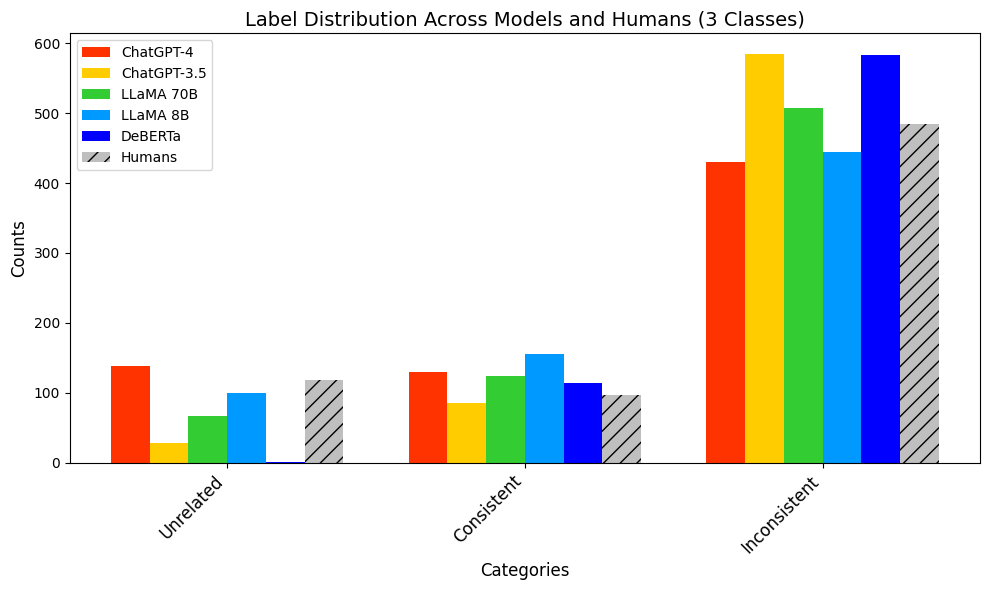

In [84]:
# Data for the graphs
labels = ['Unrelated', 'Consistent', 'Inconsistent']

chatgpt4_values = [138, 130, 430]
chatgpt35_values = [28, 85, 585]
human_values = [118, 96, 484]
llama_8b_values = [99, 155, 444]
llama_70b_values = [67, 124, 507]
deberta_values = [1, 114, 583]

# Define a clear and distinguishable color palette
colors = ['#ff3300', '#ffcc00', '#33cc33', '#0099ff', '#bfbfbf', 'blue']

# red, orange, green, light blue, purple, 
# Bar width and positions
x = np.arange(len(labels))
bar_width = 0.13  # Narrower width to fit six groups

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars in the specified order
ax.bar(x - 2.5 * bar_width, chatgpt4_values, bar_width, label='ChatGPT-4', color=colors[0])
ax.bar(x - 1.5 * bar_width, chatgpt35_values, bar_width, label='ChatGPT-3.5', color=colors[1])
ax.bar(x - 0.5 * bar_width, llama_70b_values, bar_width, label='LLaMA 70B', color=colors[2])
ax.bar(x + 0.5 * bar_width, llama_8b_values, bar_width, label='LLaMA 8B', color=colors[3])
ax.bar(x + 1.5 * bar_width, deberta_values, bar_width, label='DeBERTa', color=colors[-1])
ax.bar(x + 2.5 * bar_width, human_values, bar_width, label='Humans', color=colors[-2], hatch='//')

# Labels and title
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Label Distribution Across Models and Humans (3 Classes)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, fontsize=12, ha='right')
ax.legend()

# Display plot
plt.tight_layout()
plt.savefig 
fig.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\labels_distribution_3_classes.png', dpi=300, bbox_inches='tight')

plt.show()

### Accuracies

In [20]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_acc_per_class.pkl", 'rb') as f:
    model_acc_per_class = pickle.load(f)

In [14]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_acc_per_class_f1_score.pkl", 'rb') as f:
    model_acc_per_class_f1_score = pickle.load(f)

In [18]:
model_acc_per_class_f1_score['chatgpt4']

{'5_classes': {'Unrelated': 0.20050761421319796,
  'Consistent': 0.3130755064456722,
  'Indirect inconsistency': 0.20846905537459282,
  'Factual inconsistency': 0.05874125874125874,
  'Surface contradiction': 0.09876543209876543,
  'total': 0.5364417382675398},
 '3_classes': {'Unrelated': 0.27722772277227725,
  'Consistent': 0.3050847457627119,
  'Inconsistent': 0.29916476841306,
  'total': 0.7450695264744421}}

In [23]:
np.mean(list(model_acc_per_class['chatgpt4']['5_classes'].values()))

0.5539983981946154

In [19]:
for el in model_acc_per_class_f1_score['chatgpt4']['5_classes']:
    print(el)
    print(round(model_acc_per_class_f1_score['chatgpt4']['5_classes'][el], 3))

Unrelated
0.201
Consistent
0.313
Indirect inconsistency
0.208
Factual inconsistency
0.059
Surface contradiction
0.099
total
0.536


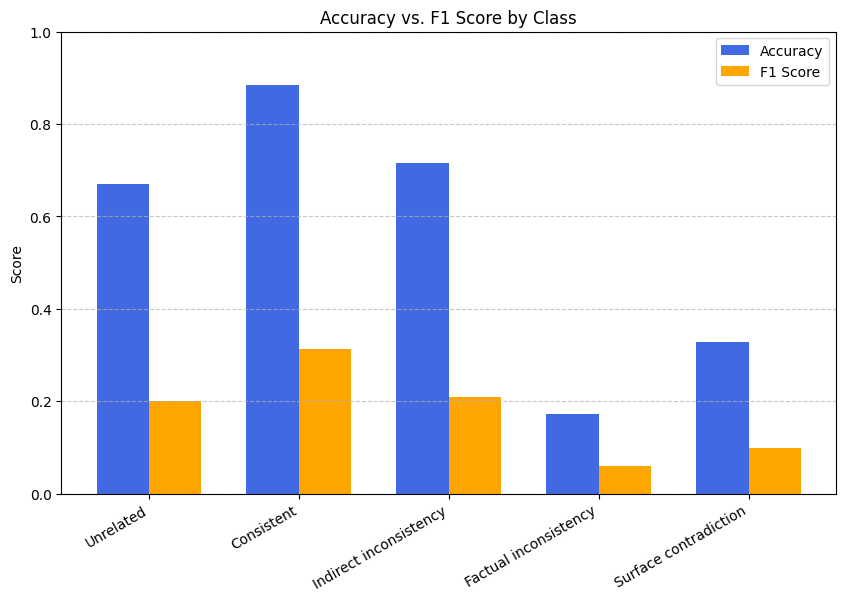

In [25]:
# Accuracy and F1 scores
categories = ['Unrelated', 'Consistent', 'Indirect inconsistency', 'Factual inconsistency', 'Surface contradiction']
accuracy = [0.669, 0.885, 0.715, 0.172, 0.328]
f1_scores = [0.200, 0.313, 0.208, 0.059, 0.099]

# Bar width
bar_width = 0.35
x = np.arange(len(categories))

# Plot bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, accuracy, bar_width, label='Accuracy', color='royalblue')
plt.bar(x + bar_width/2, f1_scores, bar_width, label='F1 Score', color='orange')

# Labels and title
plt.xticks(x, categories, rotation=30, ha='right')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Accuracy vs. F1 Score by Class')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

Total accuracies

In [34]:
predictions = list(df_gold["deberta-v3-large-nli_3_classes"])
true_labels = list(df_gold["Answer_3_classes"])
accuracy = sum(p == t for p, t in zip(predictions, true_labels)) / len(true_labels)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.734


In [14]:
classes_3 = ['Unrelated', 'Consistent', 'Inconsistent']

In [18]:
Counter(df_gold['Answer'])

Counter({'Surface contradiction': 183,
         'Indirect inconsistency': 179,
         'Factual inconsistency': 122,
         'Unrelated': 118,
         'Consistent': 96})

In [24]:
round(183/698, 3)

0.262

In [15]:
for class_name in classes_3:
    print(class_name)
    for model in model_acc_per_class:
        print(model)
        print(round(model_acc_per_class[model]['3_classes'][class_name], 3))

Unrelated
chatgpt4
0.712
chatgpt_3.5_turbo
0.178
LLaMA 8B
0.305
LLaMA 70B
0.398
DeBERTa NLI
0.008
Consistent
chatgpt4
0.844
chatgpt_3.5_turbo
0.583
LLaMA 8B
0.76
LLaMA 70B
0.833
DeBERTa NLI
0.646
Inconsistent
chatgpt4
0.814
chatgpt_3.5_turbo
0.95
LLaMA 8B
0.75
LLaMA 70B
0.897
DeBERTa NLI
0.928


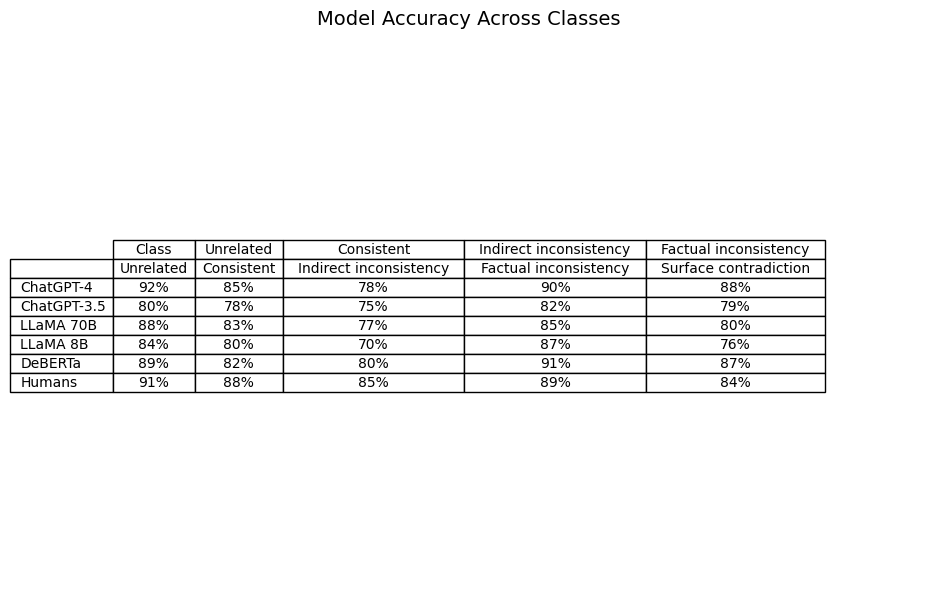

In [4]:
# Data: Accuracy for each model and class
models = ['ChatGPT-4', 'ChatGPT-3.5', 'LLaMA 70B', 'LLaMA 8B', 'DeBERTa', 'Humans']
classes = ['Unrelated', 'Consistent', 'Indirect inconsistency', 'Factual inconsistency', 'Surface contradiction']

# Accuracy values (example data, replace with actual values)
accuracy_data = [
    [92, 85, 78, 90, 88],  # ChatGPT-4
    [80, 78, 75, 82, 79],  # ChatGPT-3.5
    [88, 83, 77, 85, 80],  # LLaMA 70B
    [84, 80, 70, 87, 76],  # LLaMA 8B
    [89, 82, 80, 91, 87],  # DeBERTa
    [91, 88, 85, 89, 84]   # Humans
]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create a table
table_data = [classes] + [[f'{acc}%' for acc in row] for row in accuracy_data]
row_labels = [''] + models  # Add an empty header row for classes
table = ax.table(cellText=table_data, colLabels=['Class'] + classes, rowLabels=row_labels, loc='center', cellLoc='center', colLoc='center')

# Adjust the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(classes) + 1)))

# Add title
ax.set_title('Model Accuracy Across Classes', fontsize=14, pad=20)

# Show plot
plt.tight_layout()
plt.show()

### Agreement with humans

In [35]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_agreement_per_class.pkl", 'rb') as f:
    agreement = pickle.load(f)

In [96]:
for model in agreement:
    print(model)
    for class_name in agreement[model]['5_classes']:
        print(class_name)
        print(round(agreement[model]['5_classes'][class_name], 3))

chatgpt_4
Unrelated
0.593
Consistent
0.741
Indirect inconsistency
0.493
Factual inconsistency
0.265
Surface contradiction
0.366
chatgpt_3.5_turbo
Unrelated
0.132
Consistent
0.327
Indirect inconsistency
0.233
Factual inconsistency
0.449
Surface contradiction
0.456
LLaMA 8B
Unrelated
0.412
Consistent
0.605
Indirect inconsistency
0.212
Factual inconsistency
0.346
Surface contradiction
0.255
LLaMA 70B
Unrelated
0.447
Consistent
0.689
Indirect inconsistency
0.509
Factual inconsistency
0.29
Surface contradiction
0.399


In [57]:
classes_5 = dict()
for class_name in classes:
    classes_5[class_name] = []
    
for model in agreement:
    for class_name in agreement[model]['5_classes']:
        classes_5[class_name].append(agreement[model]['5_classes'][class_name])

In [94]:
for class_name in classes_5:
    print(class_name)
    print(round(np.mean(classes_5[class_name]), 3))

Unrelated
0.396
Consistent
0.591
Indirect inconsistency
0.362
Factual inconsistency
0.337
Surface contradiction
0.369


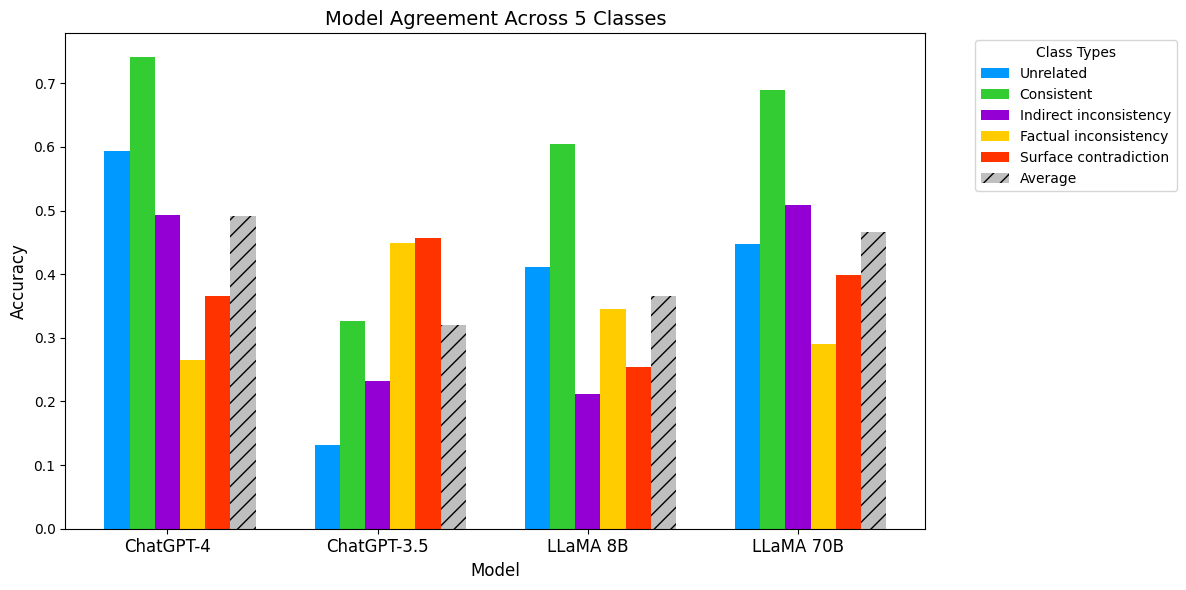

In [98]:
# Data for 5 classes
models = ['ChatGPT-4', 'ChatGPT-3.5', 'LLaMA 8B', 'LLaMA 70B']


# Calculate average score for each model for 5 classes
def average_score(classes):
    return {model: np.mean([classes[class_name][i] for class_name in classes]) for i, model in enumerate(models)}

# Average scores for each model
avg_5_classes = average_score(classes_5)

class_colors_5 = {
    'Unrelated': '#0099ff',
    'Consistent': '#33cc33',
    'Indirect inconsistency': '#9400D3',#9400D3
    'Factual inconsistency': '#ffcc00',
    'Surface contradiction': '#ff3300'
}

# Plot settings
bar_width = 0.12
index = np.arange(len(models))  # Positions for bars

# Create a new figure for the 5-classes plot
plt.figure(figsize=(12, 6))

# Plot each class's data
for i, (class_name, color) in enumerate(class_colors_5.items()):
    plt.bar(index + i * bar_width, classes_5[class_name], bar_width, label=class_name, color=color)

# # Plot the average scores for 5 classes
# plt.bar(index + len(classes_5) * bar_width, [avg_5_classes[model] for model in models], bar_width, label='Average', color='gray')
# Plot the average scores for 5 classes with hatching (striped pattern)
plt.bar(index + len(classes_5) * bar_width, 
        [avg_5_classes[model] for model in models], 
        bar_width, 
        label='Average', 
        color='#bfbfbf', 
        hatch='//')  # Adding horizontal lines for the "Average" bar

# Labeling for the 5-classes plot
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Agreement Across 5 Classes', fontsize=14)
plt.xticks(index + bar_width * 2, models, fontsize=12)
plt.legend(title="Class Types", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the 5-classes plot
plt.tight_layout()
plt.savefig(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\model_agreement_5_classes.png', dpi=300, bbox_inches='tight')

plt.show()


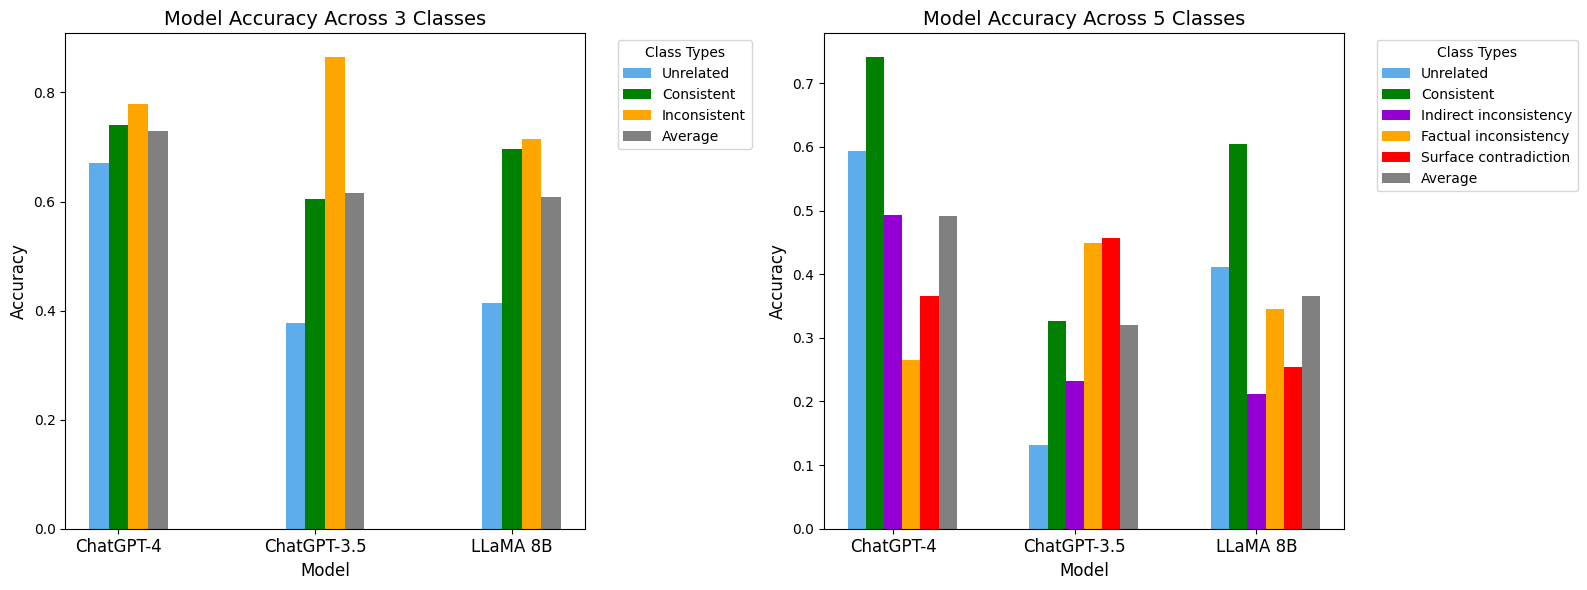

In [51]:


# Data
models = ['ChatGPT-4', 'ChatGPT-3.5', 'LLaMA 8B']
classes_3 = {
    'Unrelated': [0.6703389830508473, 0.3779661016949154, 0.4135593220338984],
    'Consistent': [0.740972222222222, 0.6055555555555556, 0.6972222222222221],
    'Inconsistent': [0.7789256198347121, 0.865220385674933, 0.7141873278236924]
}
classes_5 = {
    'Unrelated': [0.5932203389830506, 0.13220338983050844, 0.411864406779661],
    'Consistent': [0.7413194444444442, 0.3270833333333333, 0.6045138888888889],
    'Indirect inconsistency': [0.49273743016759736, 0.23258845437616382, 0.21229050279329598],
    'Factual inconsistency': [0.26530054644808726, 0.4489071038251368, 0.34562841530054667],
    'Surface contradiction': [0.36630236794171245, 0.45628415300546477, 0.2548269581056466]
}

# Calculate average score for each model for both 3 and 5 classes
def average_score(classes):
    return {model: np.mean([classes[class_name][i] for class_name in classes]) for i, model in enumerate(models)}

# Average scores for each model
avg_3_classes = average_score(classes_3)
avg_5_classes = average_score(classes_5)

# Color palette for each class
class_colors_3 = {
    'Unrelated': '#5DADEC',
    'Consistent': 'green',
    'Inconsistent': 'orange'
}

class_colors_5 = {
    'Unrelated': '#5DADEC',
    'Consistent': 'green',
    'Indirect inconsistency': '#9400D3',
    'Factual inconsistency': 'orange',
    'Surface contradiction': 'red'
}

# Plot settings
bar_width = 0.1
index = np.arange(len(models))  # Positions for bars

# Create the figure and two subplots (one for each class setup)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 3 classes
for i, (class_name, color) in enumerate(class_colors_3.items()):
    ax1.bar(index + i * bar_width, classes_3[class_name], bar_width, label=class_name, color=color)

# Plot for 5 classes
for i, (class_name, color) in enumerate(class_colors_5.items()):
    ax2.bar(index + i * bar_width, classes_5[class_name], bar_width, label=class_name, color=color)

# Plot the average scores for 3 classes on the 3-classes plot
ax1.bar(index + len(classes_3) * bar_width, [avg_3_classes[model] for model in models], bar_width, label='Average', color='gray')

# Plot the average scores for 5 classes on the 5-classes plot
ax2.bar(index + len(classes_5) * bar_width, [avg_5_classes[model] for model in models], bar_width, label='Average', color='gray')

# Labeling for the 3-classes plot
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Across 3 Classes', fontsize=14)
ax1.set_xticks(index + bar_width * 1)
ax1.set_xticklabels(models, fontsize=12)
ax1.legend(title="Class Types", bbox_to_anchor=(1.05, 1), loc='upper left')

# Labeling for the 5-classes plot
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Accuracy Across 5 Classes', fontsize=14)
ax2.set_xticks(index + bar_width * 2)
ax2.set_xticklabels(models, fontsize=12)
ax2.legend(title="Class Types", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### How agreement correlates with confidence score

if people are unsure -> harder to predict behavior?

or model doesn't understand some class at all?

Do for each model, each class

In [35]:
def plot_correlation(confidence, agreement, class_name='', model_name='', total_classes=5):
    
    # Combine confidence and agreement into pairs
    data_pairs = list(zip(confidence, agreement))

    # Count occurrences of each pair
    frequency = Counter(data_pairs)

    # Separate unique pairs and their frequencies
    unique_pairs = list(frequency.keys())
    sizes = list(frequency.values())  # Use frequencies as sizes
    unique_confidence, unique_agreement = zip(*unique_pairs)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(unique_confidence, unique_agreement, s=[size * 30 for size in sizes], color='#ff9900', alpha=0.7, label='Data Points')
    plt.plot(confidence, confidence, color='#0066cc', linestyle='-', label='Ideal Correlation')  # Optional: Add y=x line
    plt.xlabel('Annotators confidence')
    plt.ylabel('Model agreement')
    correlation = np.corrcoef(confidence, agreement)[0, 1]
    plt.title(f'{model_name}: {class_name} (r = {correlation:.2f}, total {total_classes} classes)')  # Display correlation
    plt.legend()
    plt.grid(True)
    plt.savefig(rf"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\confid_vs_agreement_{class_name}_{model_name}_{total_classes}_classes.png", dpi=300, bbox_inches='tight')
    plt.show()
    



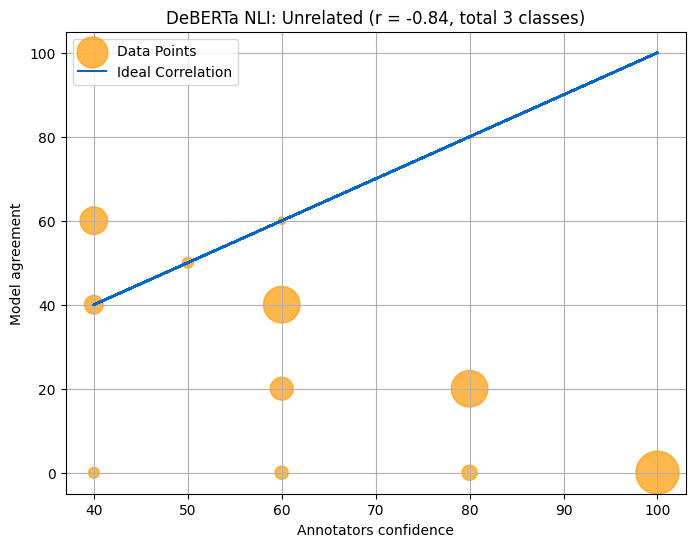

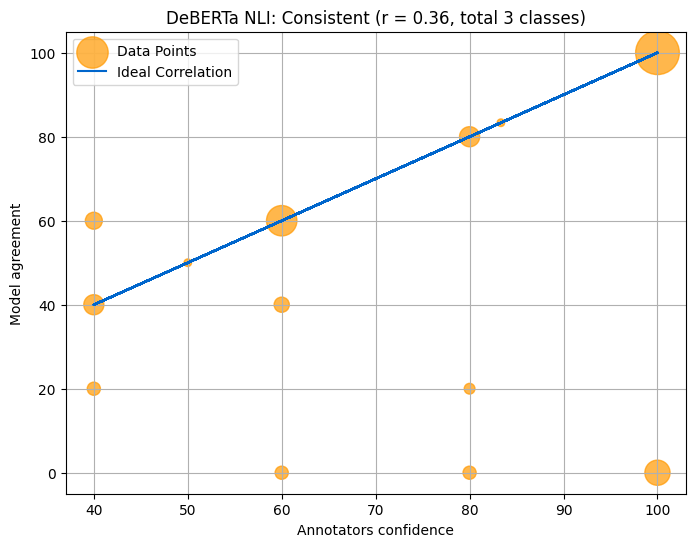

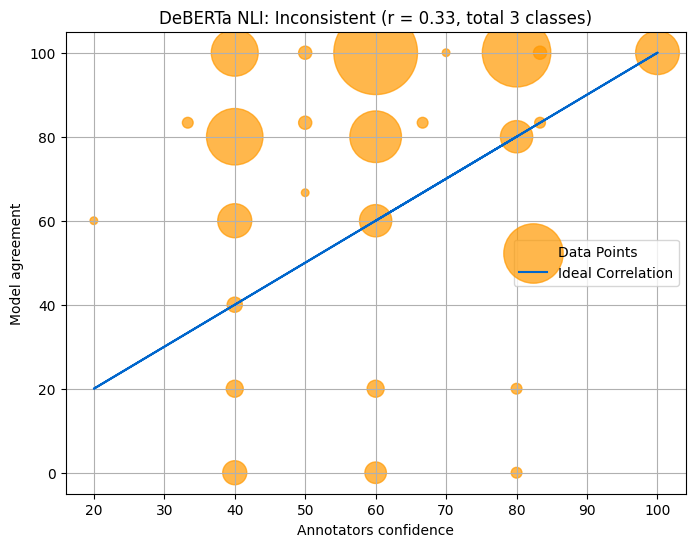

In [44]:
model_name = "DeBERTa NLI"
classes_5 = ['Unrelated', 'Consistent', 'Indirect inconsistency', 'Factual inconsistency', 'Surface contradiction']
classes_3 = ['Unrelated', 'Consistent', 'Inconsistent']


# for class_name in classes_5:
#     df_class = df_gold[df_gold['Answer'] == class_name]
#     confidence = list(df_class['Confidence'])
#     agreement = list(df_class['Model_agreement_with_human_LLaMA_70B'])
#     agreement = [el*100 for el in agreement]
#     plot_correlation(confidence, agreement, class_name=class_name, model_name=model_name, total_classes=5)
    
for class_name in classes_3:
    df_class = df_gold[df_gold['Answer_3_classes'] == class_name]
    confidence = list(df_class['Confidence'])
    agreement = list(df_class['Model_agreement_with_human_3_classes_deberta_nli'])
    agreement = [el*100 for el in agreement]
    plot_correlation(confidence, agreement, class_name=class_name, model_name=model_name, total_classes=3)
    

In [10]:
agreement = [el*100 for el in agreement]

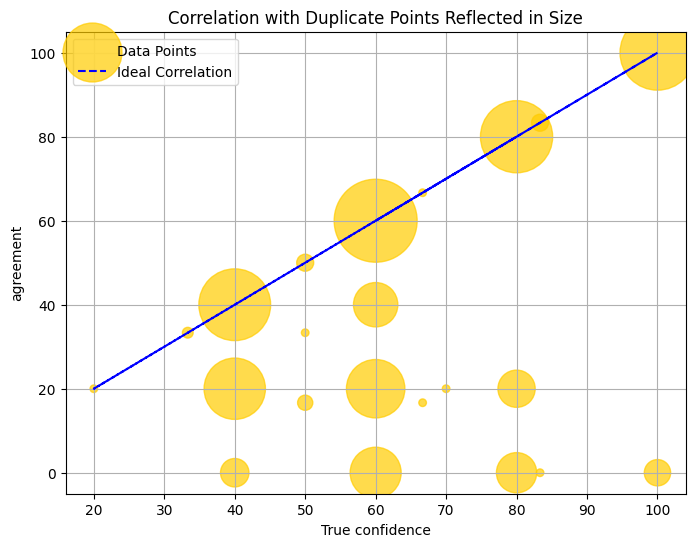

In [22]:
# Combine confidence and agreement into pairs
data_pairs = list(zip(confidence, agreement))

# Count occurrences of each pair
frequency = Counter(data_pairs)

# Separate unique pairs and their frequencies
unique_pairs = list(frequency.keys())
sizes = list(frequency.values())  # Use frequencies as sizes
unique_confidence, unique_agreement = zip(*unique_pairs)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(unique_confidence, unique_agreement, s=[size * 30 for size in sizes], color='#ffcc00', alpha=0.7, label='Data Points')
plt.plot(confidence, confidence, color='blue', linestyle='--', label='Ideal Correlation')  # Optional: Add y=x line
plt.xlabel('True confidence')
plt.ylabel('agreement')
plt.title('Correlation with Duplicate Points Reflected in Size')
plt.legend()
plt.grid(True)
plt.show()

if confidence is 20, but agreement = 100

1/5 people voted for the class

sets an upper bound

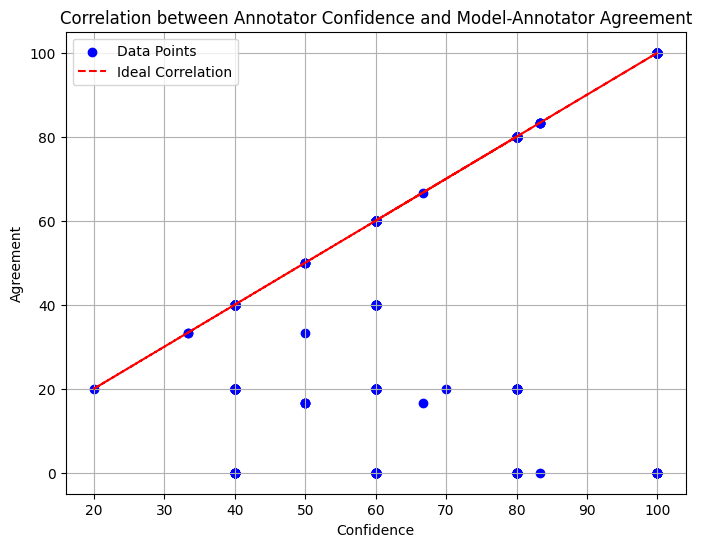

In [12]:
# Create a scatter plot to show correlation
plt.figure(figsize=(8, 6))
plt.scatter(confidence, agreement, color='blue', label='Data Points')
plt.plot(confidence, confidence, color='red', linestyle='--', label='Ideal Correlation')  # Optional: Add y=x line
plt.xlabel('Confidence')
plt.ylabel('Agreement')
plt.title('Correlation between Annotator Confidence and Model-Annotator Agreement')
plt.legend()
plt.grid(True)
plt.show()

### How interannotator agreement changes when the model is considered as the 6th annotator

In [3]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_as_6th_annotator.pkl", 'rb') as f:
    model_as_6th_annotator = pickle.load(f)

5 classes

In [110]:
stages = [model for model in model_as_6th_annotator if model != 'Deberta']
scores = [model_as_6th_annotator[model]["5_classes"]["krippendorff_ordinal"] for model in model_as_6th_annotator if model != 'Deberta']

In [111]:
model_to_score = dict(zip(stages, scores))

In [112]:
stages = ['Humans'] + stages[:-1]
# Example data: Replace these with your actual results
human_score = [model_to_score['Humans']]   # Human agreement score (Before)
model_scores = [[el] for el in scores[:-1]]

In [113]:
human_score = [model_to_score['Humans']]  # Human agreement score (Before)
model_scores = [model_to_score[model] for model in model_to_score if model != "Humans"]

# Assign colors to each model
colors = ['brown', 'green', 'red', 'purple', 'orange']
labels = ['Human Agreement'] + [model for model in model_to_score if model != "Humans"]

In [114]:
# Separate human and model model_to_score
human_score = [model_to_score['Humans']]   # Human agreement score (Before)
model_scores = [
    [model_to_score['ChatGPT-4']] ,  # After ChatGPT-4
    [model_to_score['ChatGPT-3.5']] ,  # After ChatGPT-3.5
    [model_to_score['LLaMA 8B']] ,  # After LLaMA 8B
    [model_to_score['LLaMA 70B']]    # After LLaMA 70B
]


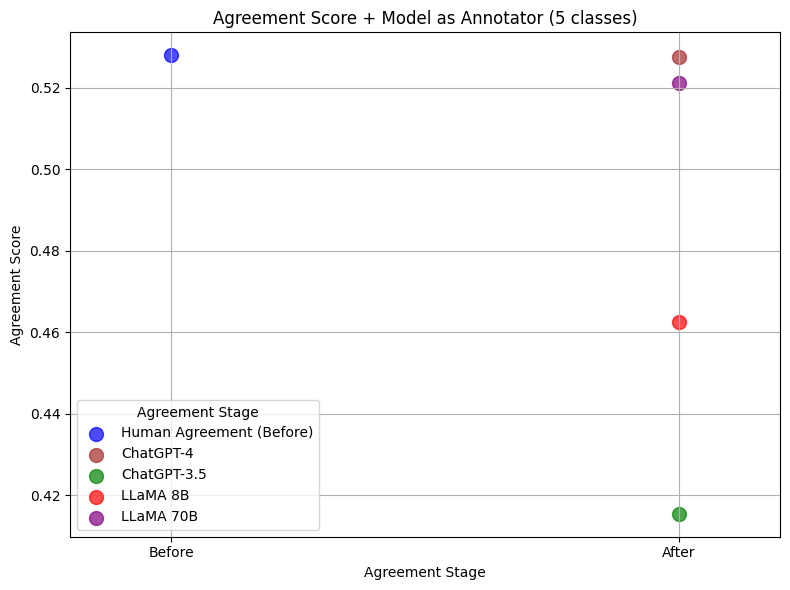

In [115]:
# Create the plot
plt.figure(figsize=(8, 6))

# Adjusted x positions for "Before" and "After" columns
x_before = 0  # Position for Before
x_after = 1   # Position for After (all models will be plotted here)

# Plot the human agreement score (Before) without jitter
plt.scatter([x_before] * len(human_score), np.array(human_score), color='blue', label='Human Agreement (Before)', alpha=0.7, s=100)

# Plot model agreement scores (After) without jitter
for i, scores in enumerate(model_scores):
    plt.scatter([x_after] * len(scores), np.array(scores), color=colors[i], label=labels[i + 1], alpha=0.7, s=100)

# Adjust x-axis limits to bring columns closer
plt.xlim(-0.2, 1.2)  # Extend the x-axis range slightly to allow some padding

# Add labels and title
plt.xlabel('Agreement Stage')
plt.ylabel('Agreement Score')
plt.title('Agreement Score + Model as Annotator (5 classes)')

# Customize x-axis tick positions and labels
plt.xticks([x_before, x_after], ['Before', 'After'])

# Add legend
plt.legend(title='Agreement Stage')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\model_as_annotator_5_classes.png", dpi=300, bbox_inches='tight')
plt.show()

3 classes

In [116]:
stages = [model for model in model_as_6th_annotator]
scores = [model_as_6th_annotator[model]["3_classes"]["krippendorff_nominal"] for model in model_as_6th_annotator]

In [117]:
scores

[0.515277402708936,
 0.4671899085982133,
 0.4480869910575025,
 0.5059397824086319,
 0.4407783097442195,
 0.5073399681871671]

In [118]:
model_to_score = dict(zip(stages, scores))

In [119]:
stages = ['Humans'] + stages[:-1]
human_score = [model_to_score['Humans']]   # Human agreement score (Before)
model_scores = [[el] for el in scores[:-1]]

In [120]:
human_score = [model_to_score['Humans']]  # Human agreement score (Before)
model_scores = [model_to_score[model] for model in model_to_score if model != "Humans"]

# Assign colors to each model
colors = ['blue', 'green', 'red', 'purple', 'orange', "brown"]
labels = ['Human Agreement'] + [model for model in model_to_score if model != "Humans"]

In [121]:
model_to_score

{'ChatGPT-4': 0.515277402708936,
 'ChatGPT-3.5': 0.4671899085982133,
 'LLaMA 8B': 0.4480869910575025,
 'LLaMA 70B': 0.5059397824086319,
 'Deberta': 0.4407783097442195,
 'Humans': 0.5073399681871671}

In [122]:
# Separate human and model model_to_score
human_score = [model_to_score['Humans']]   # Human agreement score (Before)
model_scores = [
    [model_to_score['ChatGPT-4']] ,  # After ChatGPT-4
    [model_to_score['ChatGPT-3.5']] ,  # After ChatGPT-3.5
    [model_to_score['LLaMA 8B']] ,  # After LLaMA 8B
    [model_to_score['LLaMA 70B']],   # After LLaMA 70B
    [model_to_score['Deberta']]
]


In [123]:
colors = ['brown', 'green', 'red', 'purple', 'orange', "yellow"]


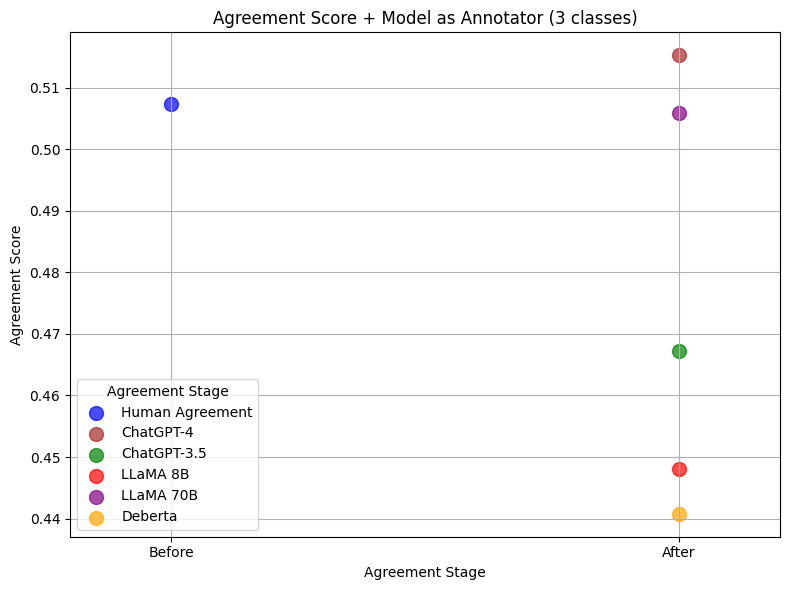

In [124]:
# Create the plot
plt.figure(figsize=(8, 6))

# Adjusted x positions for "Before" and "After" columns
x_before = 0  # Position for Before
x_after = 1   # Position for After (all models will be plotted here)

# Plot the human agreement score (Before) without jitter
plt.scatter([x_before] * len(human_score), np.array(human_score), color='blue', label='Human Agreement', alpha=0.7, s=100)

# Plot model agreement scores (After) without jitter
for i, scores in enumerate(model_scores):
    plt.scatter([x_after] * len(scores), np.array(scores), color=colors[i], label=labels[i + 1], alpha=0.7, s=100)

# Adjust x-axis limits to bring columns closer
plt.xlim(-0.2, 1.2)  # Extend the x-axis range slightly to allow some padding

# Add labels and title
plt.xlabel('Agreement Stage')
plt.ylabel('Agreement Score')
plt.title('Agreement Score + Model as Annotator (3 classes)')

# Customize x-axis tick positions and labels
plt.xticks([x_before, x_after], ['Before', 'After'])

# Add legend
plt.legend(title='Agreement Stage')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\model_as_annotator_3_classes.png", dpi=300, bbox_inches='tight')
plt.show()

In [98]:
scores

0.515277402708936

### Agreement with individuals

In [4]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\avg_agreement_with_individuals.pkl", 'rb') as f:
    avg_agreement_with_individuals = pickle.load(f)

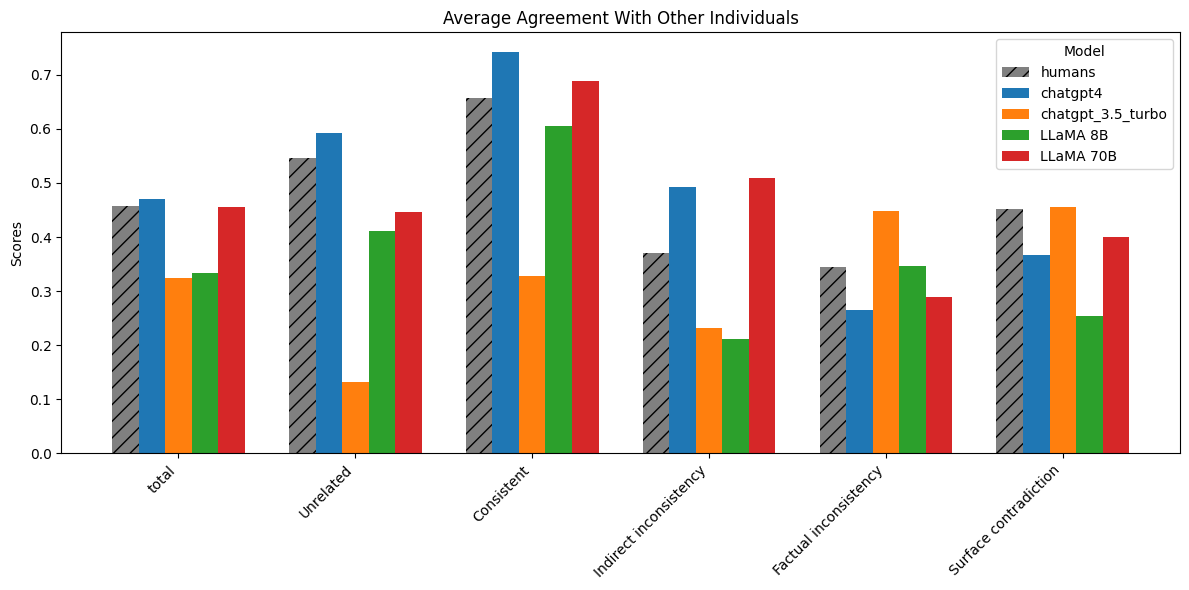

In [15]:
# Extract categories and models
categories = list(next(iter(avg_agreement_with_individuals['5_classes'].values())).keys())
models = list(avg_agreement_with_individuals['5_classes'].keys())

# Organize the avg_agreement_with_individuals for plotting
scores = {model: [avg_agreement_with_individuals['5_classes'][model][category] for category in categories] for model in models}

# Plot grouped bar chart
x = np.arange(len(categories))  # positions for the categories
bar_width = 0.15  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))
for i, model in enumerate(models):
    if model == 'humans':  # Apply grey color and hatching for 'humans'
        ax.bar(
            x + i * bar_width,
            scores[model],
            bar_width,
            color='grey',
            # edgecolor='black',
            hatch='//',  # Diagonal hatching
            label=model
        )
    else:
        
        ax.bar(x + i * bar_width, scores[model], bar_width, label=model)

# Add labels, title, and legend
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylabel('Scores')
ax.set_title('Average Agreement With Other Individuals')
ax.legend(title='Model')

plt.tight_layout()
plt.savefig(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\avg_agreement_with_individuals.png", dpi=300, bbox_inches='tight')
plt.show()

### Agreement with majority label

In [3]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\avg_agreement_with_majority.pkl", 'rb') as f:
    avg_agreement_with_majority = pickle.load(f)

In [6]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\avg_synthetic_agreement_per_class.json", 'r') as f:
    avg_synthetic_agreement_per_class = json.load(f)

In [9]:
avg_agreement_with_majority

{'5_classes': {'humans': {'total': 0.512989493791786,
   'Unrelated': 0.6101694915254237,
   'Consistent': 0.6763888888888889,
   'Indirect inconsistency': 0.4394785847299813,
   'Factual inconsistency': 0.3762295081967213,
   'Surface contradiction': 0.5276867030965391},
  'chatgpt4': {'total': 0.5196752626552054,
   'Unrelated': 0.664406779661017,
   'Consistent': 0.8229166666666666,
   'Indirect inconsistency': 0.6242085661080073,
   'Factual inconsistency': 0.2278688524590164,
   'Surface contradiction': 0.3595628415300547},
  'chatgpt_3.5_turbo': {'total': 0.3538681948424069,
   'Unrelated': 0.10169491525423731,
   'Consistent': 0.31875000000000003,
   'Indirect inconsistency': 0.23482309124767226,
   'Factual inconsistency': 0.5475409836065575,
   'Surface contradiction': 0.5222222222222223},
  'LLaMA 8B': {'total': 0.3530085959885387,
   'Unrelated': 0.4355932203389831,
   'Consistent': 0.6770833333333334,
   'Indirect inconsistency': 0.2011173184357542,
   'Factual inconsistenc

In [8]:
avg_agreement_with_majority['5_classes']['synthetic'] = avg_synthetic_agreement_per_class

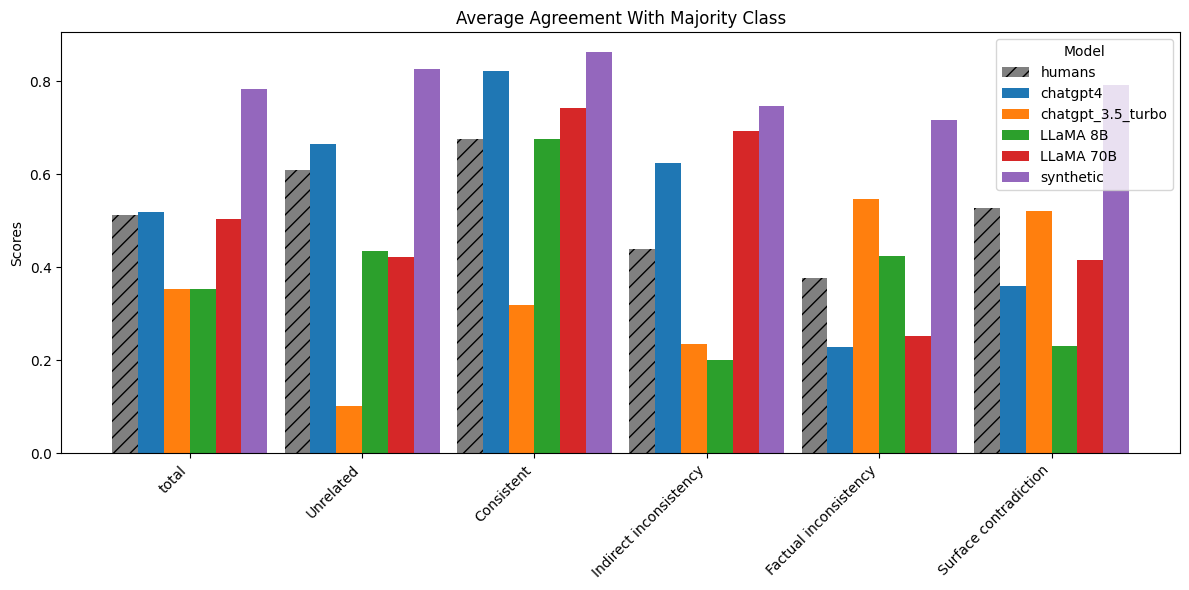

In [10]:
# Extract categories and models
categories = list(next(iter(avg_agreement_with_majority['5_classes'].values())).keys())
models = list(avg_agreement_with_majority['5_classes'].keys())

# Organize the avg_agreement_with_majority for plotting
scores = {model: [avg_agreement_with_majority['5_classes'][model][category] for category in categories] for model in models}

# Plot grouped bar chart
x = np.arange(len(categories))  # positions for the categories
bar_width = 0.15  # width of each bar

# Custom colors for the models (except humans)
custom_colors = {
    'chatgpt4': '#1f77b4',          # Blue
    'chatgpt_3.5_turbo': '#ff7f0e', # Orange
    'LLaMA 8B': '#2ca02c',          # Green
    'LLaMA 70B': '#d62728', # Red
    'synthetic': '#000000'
}


fig, ax = plt.subplots(figsize=(12, 6))
# Add bars for each model
for i, model in enumerate(models):
    if model == 'humans':  # Apply grey color and hatching for 'humans'
        ax.bar(
            x + i * bar_width,
            scores[model],
            bar_width,
            color='grey',
            # edgecolor='black',
            hatch='//',  # Diagonal hatching
            label=model
        )
    else:  # Standard colored bars for other models
        ax.bar(
            x + i * bar_width,
            scores[model],
            bar_width,
            label=model
        )



# Add labels, title, and legend
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylabel('Scores')
ax.set_title('Average Agreement With Majority Class')
ax.legend(title='Model')

plt.tight_layout()
# plt.savefig(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\avg_agreement_with_majority.png", dpi=300, bbox_inches='tight')

plt.show()

In [4]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_acc_per_class_f1_score.pkl", 'rb') as f:
    model_acc_per_class_f1_score = pickle.load(f)
    
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_acc_per_class.pkl", 'rb') as f:
    model_acc_per_class = pickle.load(f)
    
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\model_agreement_per_class.pkl", 'rb') as f:
    model_agreement_per_class = pickle.load(f)


In [10]:
with open(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\model_evaluations\avg_synthetic_agreement_per_class_f1.json", 'r') as f:
    avg_synthetic_agreement_per_class_f1 = json.load(f)

In [12]:
model_acc_per_class_f1_score['synthetic'] = dict()
model_acc_per_class_f1_score['synthetic']['5_classes'] = avg_synthetic_agreement_per_class_f1

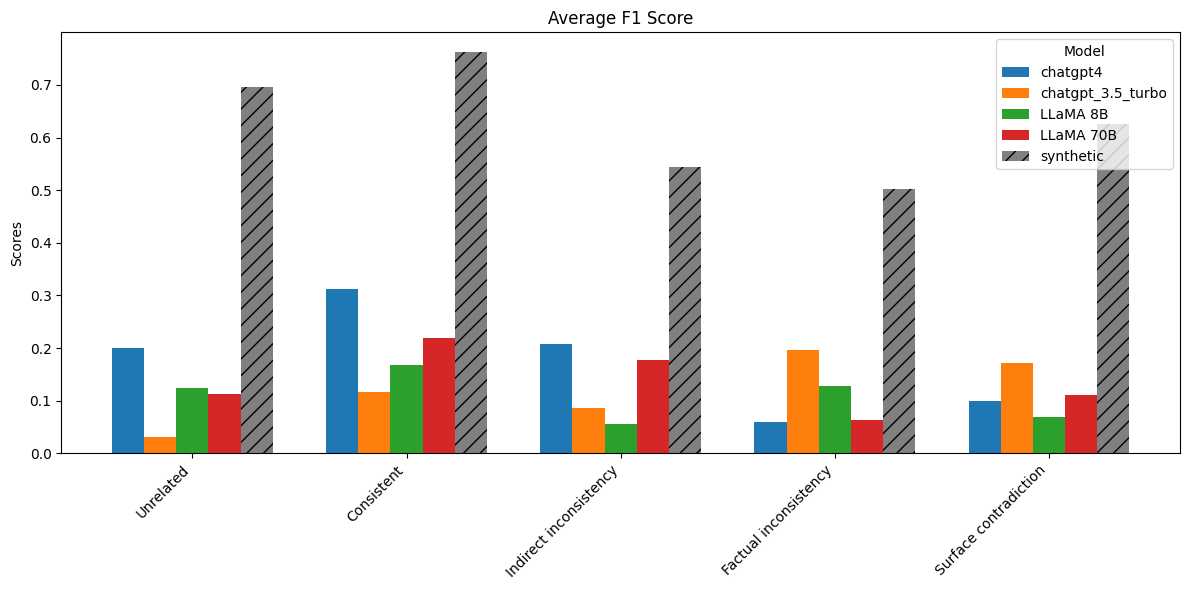

In [17]:
# Extract categories and models
categories = classes_5
models = ['chatgpt4', 'chatgpt_3.5_turbo', 'LLaMA 8B', 'LLaMA 70B', 'synthetic']

# Organize the model_acc_per_class_f1_score for plotting
scores = {model: [model_acc_per_class_f1_score[model]['5_classes'][category] for category in categories] for model in models}

# Plot grouped bar chart
x = np.arange(len(categories))  # positions for the categories
bar_width = 0.15  # width of each bar

# Custom colors for the models (except humans)
custom_colors = {
    'chatgpt4': '#1f77b4',          # Blue
    'chatgpt_3.5_turbo': '#ff7f0e', # Orange
    'LLaMA 8B': '#2ca02c',          # Green
    'LLaMA 70B': '#d62728', # Red
    # 'synthetic': '#000000'
}


fig, ax = plt.subplots(figsize=(12, 6))
# Add bars for each model
for i, model in enumerate(models):
    if model == 'synthetic':  # Apply grey color and hatching for 'humans'
        ax.bar(
            x + i * bar_width,
            scores[model],
            bar_width,
            color='grey',
            # edgecolor='black',
            hatch='//',  # Diagonal hatching
            label=model
        )
    else:  # Standard colored bars for other models
        ax.bar(
            x + i * bar_width,
            scores[model],
            bar_width,
            label=model
        )



# Add labels, title, and legend
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylabel('Scores')
ax.set_title('Average F1 Score')
ax.legend(title='Model')

plt.tight_layout()
# plt.savefig(r"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\model_acc_per_class_f1_score.png", dpi=300, bbox_inches='tight')

plt.show()

### Repeated trial results (shifting)

In [3]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\qualtrics_survey\question_repeated_trial.pkl', 'rb') as f:
    question_repeated_trial = pickle.load(f)

In [4]:
question_repeated_trial

{'Text 1: Motivated and confident workforce is a crucial success factor for the economy.\n\nText 2: We support limiting the scope of employee influence in decision-making within companies to promote competitiveness.': {'v1': ['Indirect inconsistency',
   'Indirect inconsistency',
   'Indirect inconsistency'],
  'v2': ['Indirect inconsistency',
   'Indirect inconsistency',
   'Indirect inconsistency']},
 'Text 1: We want broad support for agriculture with no limitations.\n\nText 2: We support the exclusive promotion of organic agriculture.': {'v1': ['Consistent',
   'Surface contradiction'],
  'v2': ['Surface contradiction', 'Surface contradiction'],
  'v4': ['Surface contradiction', 'Surface contradiction']},
 'Text 1: There should be a €29 ticket for everyone to use local public transport.\n\nText 2: Passengers need to pass a background-check and have stable income to qualify for the discounted ticket subscription.': {'v1': ['Indirect inconsistency',
   'Factual inconsistency'],
  'v2

Count if there's disbalance (which annotator had most duplicates - 2 and more times )

In [7]:
annotators = [person for sample in question_repeated_trial for person in question_repeated_trial[sample]]

In [9]:
Counter(annotators)

Counter({'v3': 30,
         'v5': 29,
         'v4': 27,
         'v10': 27,
         'v7': 26,
         'v8': 24,
         'v6': 23,
         'v9': 21,
         'v1': 18,
         'v2': 18})

In [10]:
with open(r'C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\data\qualtrics_survey\change_per_class.pkl', 'rb') as f:
    change_per_class = pickle.load(f)

In [ ]:
for class_name in change_per_class['2_times']:
    print(class_name)
    answers = change_per_class['2_times']['Factual inconsistency']['answers']
    annotators = change_per_class['2_times']['Factual inconsistency']['annotators']

    # Step 1: Initialize a dictionary to track switches
    switch_count = {}

    # Step 2: Iterate over the data and count non-"Factual inconsistency" answers
    for annotator, answer in zip(annotators, answers):
        if answer != class_name:  # Check if it's a "switch"
            switch_count[annotator] = switch_count.get(annotator, 0) + 1

    # Step 3: Display the results
    sorted_switch_count = dict(sorted(switch_count.items(), key=lambda item: item[1], reverse=True))
    print(sorted_switch_count)

In [ ]:
Annotators who switched

Unrelated
{'v10': 9, 'v3': 4, 'v5': 4, 'v6': 3, 'v7': 3, 'v4': 2, 'v8': 2, 'v1': 1}
Consistent
{'v10': 8, 'v3': 4, 'v5': 4, 'v6': 3, 'v7': 3, 'v4': 2, 'v8': 2, 'v1': 1}
Indirect inconsistency
{'v10': 5, 'v5': 4, 'v3': 2, 'v6': 2, 'v4': 2, 'v1': 1, 'v7': 1, 'v8': 1}
Factual inconsistency
{'v10': 6, 'v3': 4, 'v7': 2, 'v4': 1, 'v6': 1, 'v8': 1}
Surface contradiction
{'v10': 8, 'v5': 4, 'v6': 3, 'v7': 3, 'v3': 2, 'v8': 2, 'v1': 1, 'v4': 1}

In [12]:
change_per_class

{'2_times': {'Unrelated': {'answers': ['Unrelated',
    'Unrelated',
    'Consistent',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Consistent',
    'Unrelated',
    'Consistent',
    'Factual inconsistency',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Factual inconsistency',
    'Unrelated',
    'Unrelated',
    'Unrelated',
    'Unrelated'],
   'annotators': ['v9',
    'v2',
    'v1',
    'v1',
    'v2',
    'v6',
    'v2',
    'v2',
    'v8',
    'v9',
    'v3',
    'v9',
    'v10',
    'v6',
    'v4',
    'v6',
    'v4',
    'v4',
    'v5',
    'v9',
    'v6',
    'v9',
    'v8',
    'v4',
    'v8',
    'v8',
    'v8']},
  'Consistent': {'answers': ['Surface contradiction',
    'Consistent',
    'Consistent',
    'Consistent',
    'Consistent',
    'Consistent',
    'Consistent',
    'Consistent',
    'Consis

### Confusion matrices

In [3]:
from sklearn.metrics import confusion_matrix

In [5]:
classes_5 = ['Unrelated', 'Consistent', 'Indirect inconsistency', "Factual inconsistency", 'Surface contradiction']                             
classes_3 = ['Unrelated', 'Consistent', 'Inconsistent']

In [6]:
confusion_matrix_per_model_class = dict()

In [20]:
model_name = 'ChatGPT-4'

confusion_matrix_per_model_class['5_classes'] = {}

true_labels = list(df_gold['Answer'])
predictions = list(df_gold['ChatGPT-4 5 classes'])
cm = confusion_matrix(true_labels, predictions, labels=classes_5)
confusion_matrix_per_model_class['5_classes'][model_name] = cm

In [25]:
model_name = 'LLaMA 70B'

true_labels = list(df_gold['Answer'])
predictions = list(df_gold[f'{model_name} 5 classes'])
cm = confusion_matrix(true_labels, predictions, labels=classes_5)
confusion_matrix_per_model_class['5_classes'][model_name] = cm

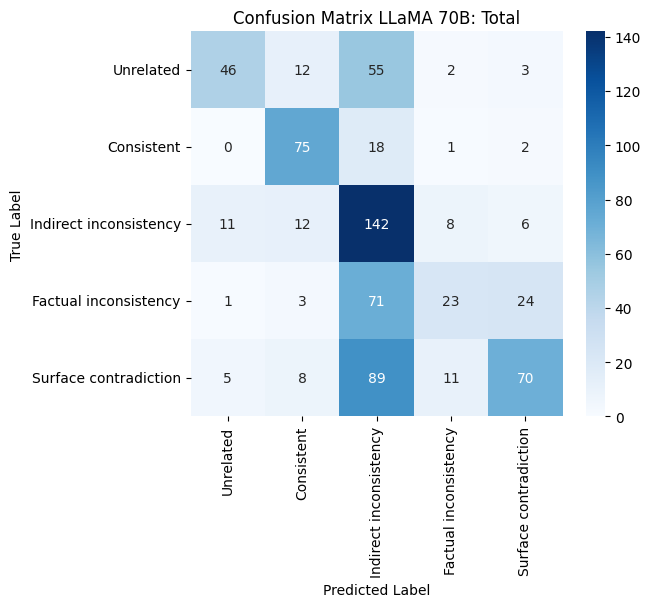

In [26]:
cm = confusion_matrix_per_model_class['5_classes'][model_name]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes_5, yticklabels=classes_5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix {model_name}: Total")
plt.savefig(rf"C:\Users\Nursulu_1\Downloads\ContraDetect\automatic_stance_detection\notebooks\visualizations\confusion_matrices\{model_name}_5_classes_total.png", dpi=300, bbox_inches='tight')
plt.show()